In [2]:
library('hdp')
library('clusterCrit')
library('grid')
library('gridExtra')
library('ggplot2')
library('ggrepel')
library('RColorBrewer')
library('dplyr')
library('reshape2')
library('IRdisplay')
source('../../../src/tools.R')     # custom tools function
#source('../../../src/hdp_tools.R') # hdp related functions
source('../../../src/hdp_tools_yanis.R')
library(scales)
theme_set(theme_minimal())

# set jupyer notebook parameters
options(repr.plot.res        = 100, # set a medium-definition resolution for the jupyter notebooks plots (DPI)
        repr.matrix.max.rows = 200, # set the maximum number of rows displayed
        repr.matrix.max.cols = 200) # set the maximum number of columns displayed

In [6]:
df_final <- read.table("../finalization_clustering/all_components_with_second_complex_inv3.tsv")
df_final <- df_final[,c(1:150,155,156)]

In [7]:
#100*colSums(df_final)/dim(df_final)[1]
dim(df_final)

[1] 2094  152

In [8]:
launch <- function(data,base_dist,initial_clusters,burn,posterior_samples,chains,aa,ab){
    number_of_chains <- chains
    chain_list <- vector('list', number_of_chains)
    hdp <- initialise_hdp_yanis(data = data,hh=base_dist,alphaa = aa,alphab= ab)


    for (i in 1:number_of_chains) {
        seed <- i * 100
        print_and_flush(sprintf('### Experiment %d (seed = %d) ###\n', i, seed))

        # run single hdp chain
        chain_list[[i]] <- activate_and_run_hdp(hdp,
                                                initcc = initial_clusters,
                                                burnin = burn,
                                                n      = posterior_samples,
                                                space  = 20,
                                                seed   = seed)
        print_and_flush('\n')
    }

    multi_output <- hdp_multi_chain(chain_list)
    print(multi_output)
}

In [9]:

num_cols = ncol(df_final)
bin <- function(x){
    set.seed(123)
  (rbinom(1, num_cols, mean(x))+1)/num_cols
}

###Normal

normal <- function(x){
    set.seed(123)
  abs(rnorm(1,mean(x),sd(x)))
}

###Poisson

poisson <- function(x){
    set.seed(123)
  (rpois(num_cols,1))/num_cols
}

###Uniform equally over all columns

equally <- function(x){
    set.seed(123)
  1/num_cols
}

###Repet 1

repet <- function(x){
    set.seed(123)
  1
}

binomial <- unlist(sapply(df_final,bin))
gaussian <- unlist(sapply(df_final,normal))
pois <- as.numeric(unlist(sapply(df_final,poisson)))
unif <- unlist(sapply(df_final,equally))
repetition <- unlist(sapply(df_final,repet))
lists<- list(binomial,gaussian,unif,repetition)


In [26]:
data <- df_final
posterior_samples <- 250
initial_clusters <- 17
burn <- 7000
chains <- 3
base_dist <- gaussian
aa <- 3
ab <- 0.5

# I) Initial Component : Component 0 to 10

In [27]:
multi_output <- launch(data,base_dist,initial_clusters,burn,posterior_samples,chains,aa,ab)
multi_output_cluster_10 <- extract_components(multi_output)

Initialise HDP on a 2094 x 152 dataframe
  → create HDP structure... done!
  → add DP node for each patient... done!
  → assign the data to the nodes... done!
### Experiment 1 (seed = 100) ###
Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "7000 burn-in iterations in 0.4 mins"

### Experiment 2 (seed = 200) ###
Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "7000 burn-in iterations in 0.5 mins"

### Experiment 3 (seed = 300) ###
Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "7000 burn-in iterations in 0.4 mins"

Object of class hdpSampleMulti 
 Number of chains: 3 
 Total posterior samples: 750 
 Components: NO. Run hdp_extract_components 
 ----------
 Final hdpState from first chain: 
Object of class hdpState 
 Number of DP nodes: 2095 
 Index of parent DP: 0 1 1 1 1 1 1 1 1 1 ...
 Number of 

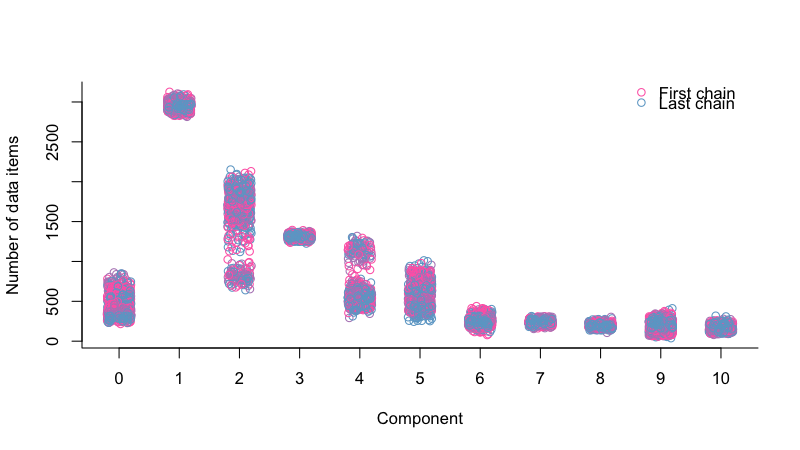

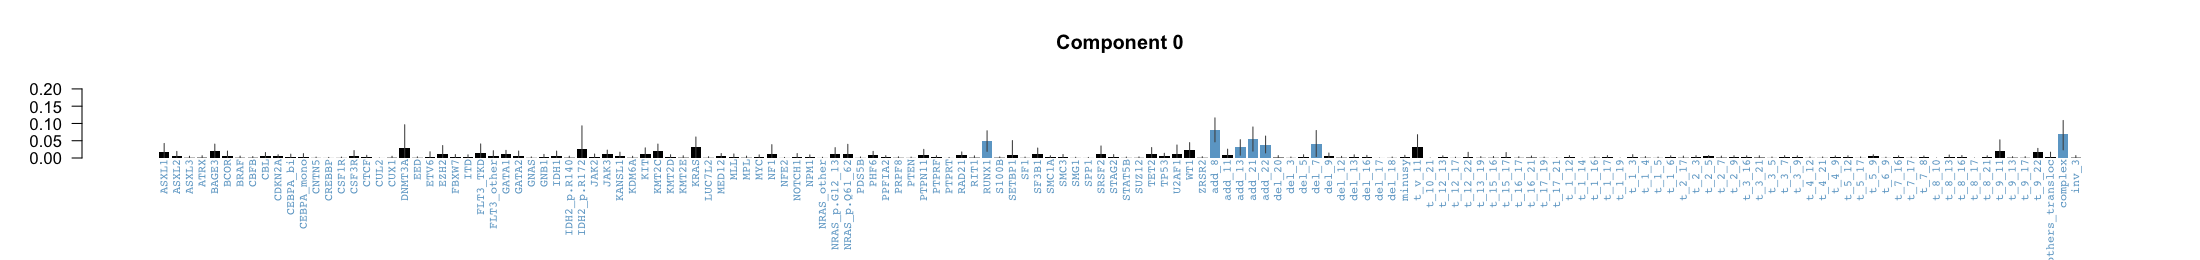

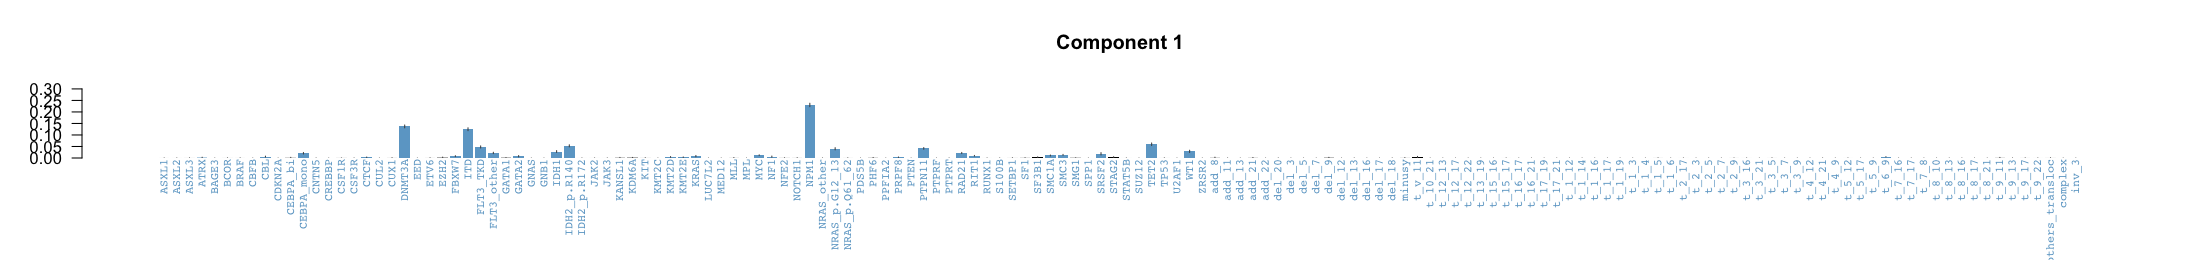

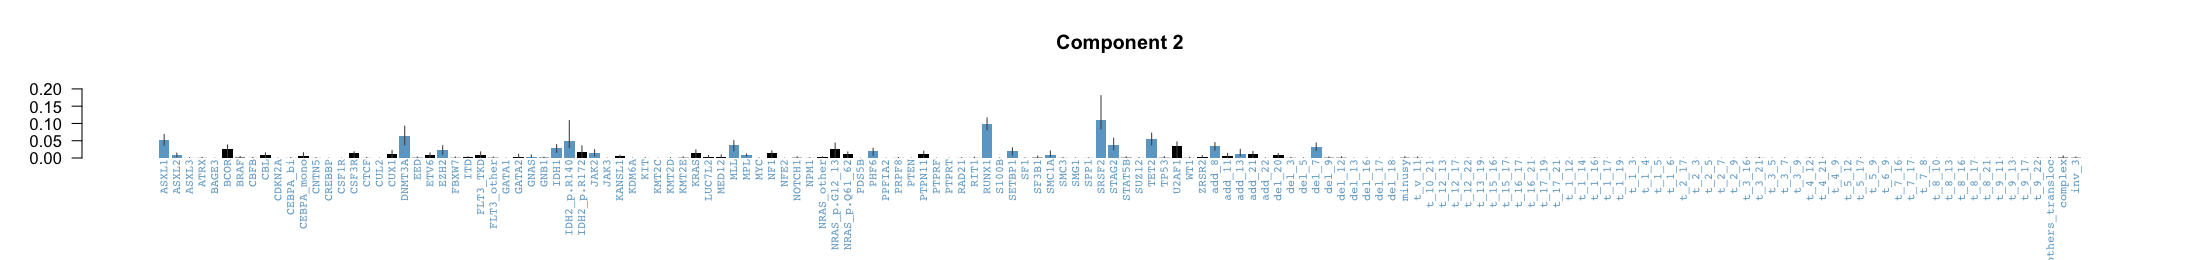

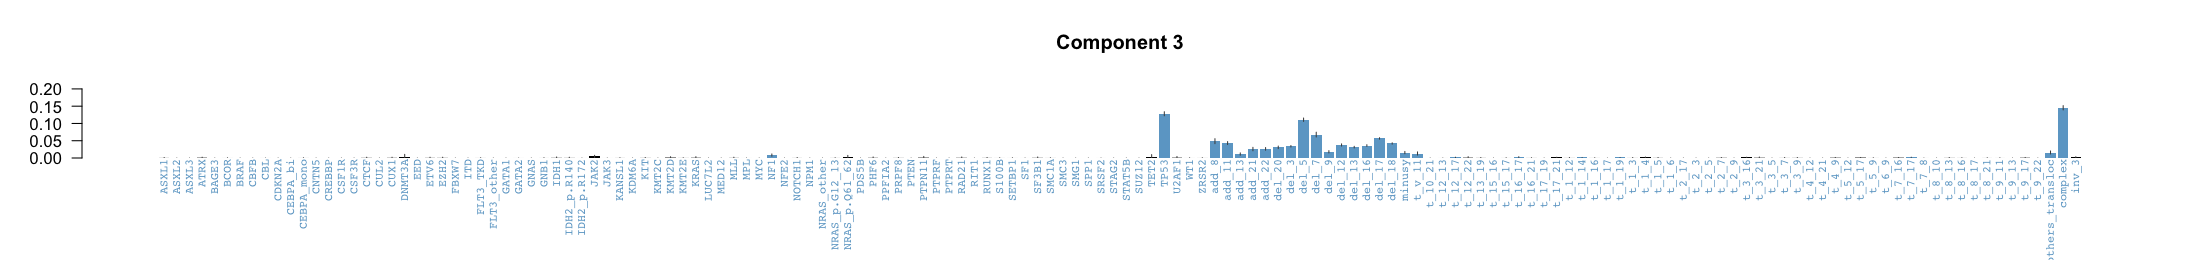

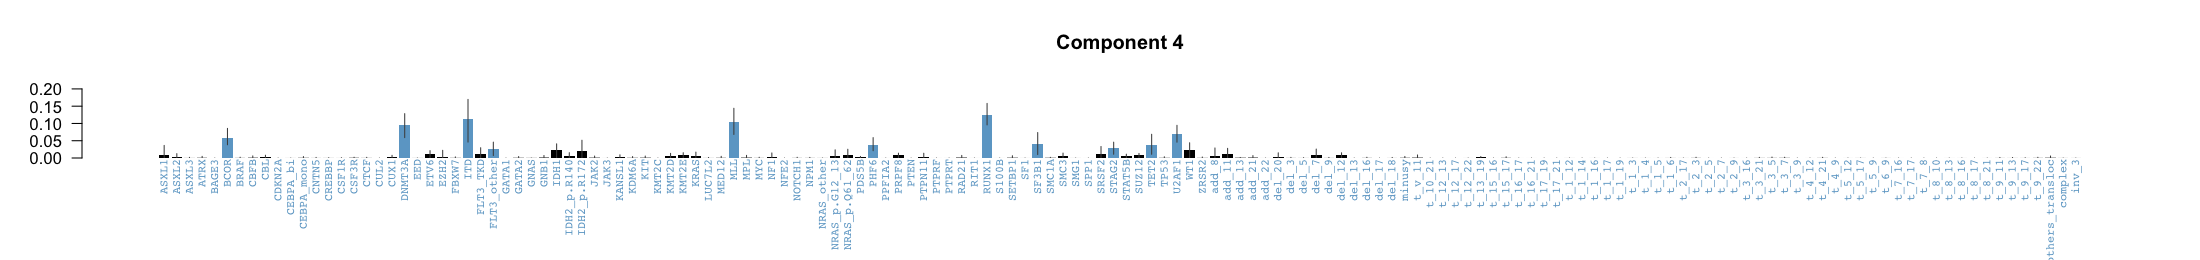

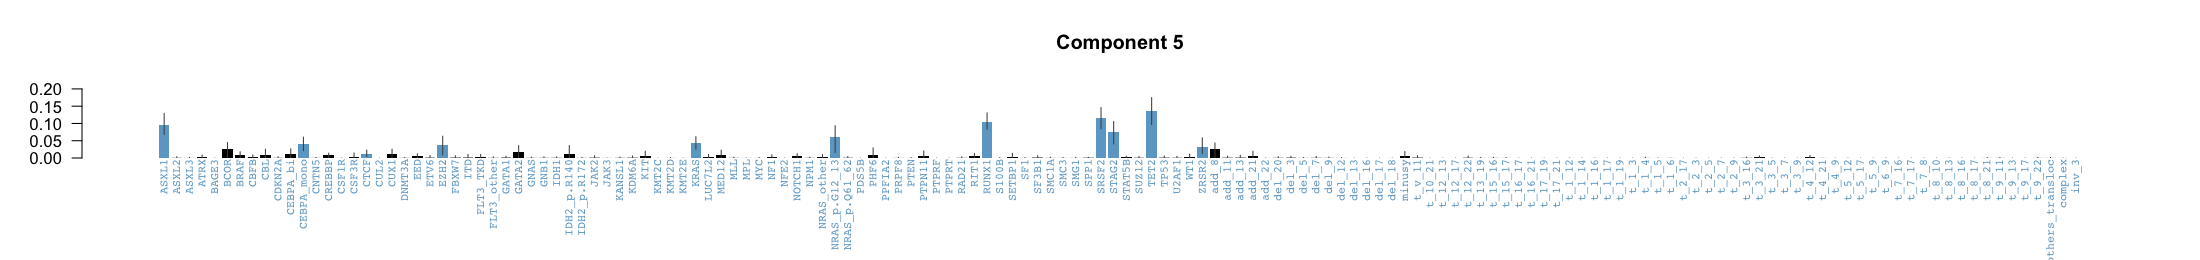

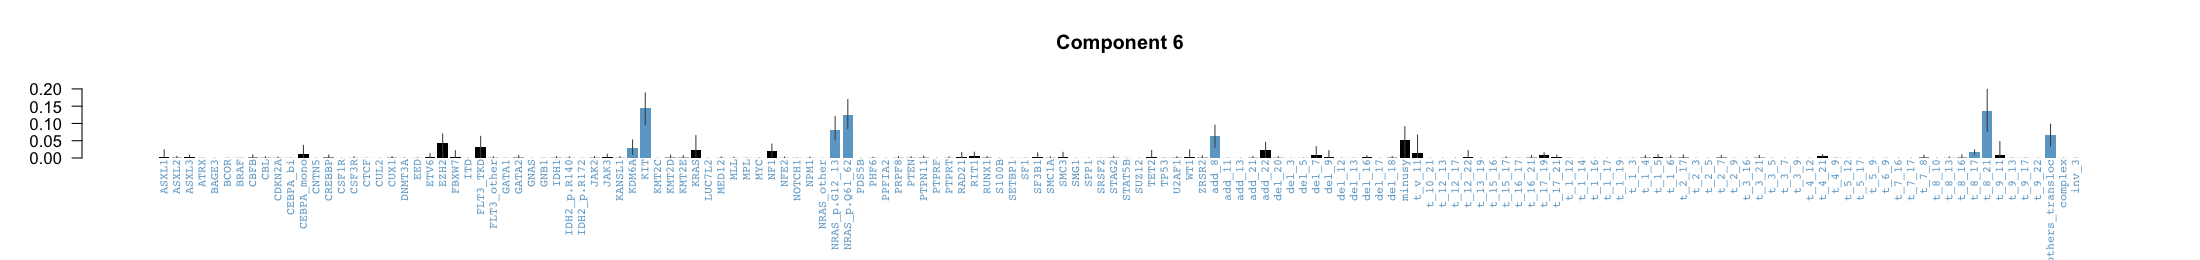

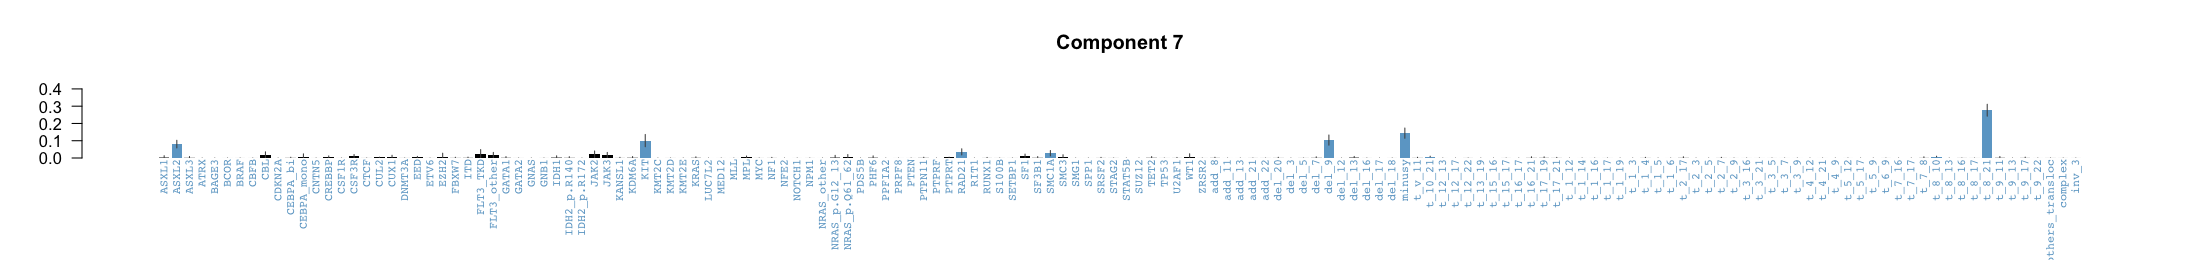

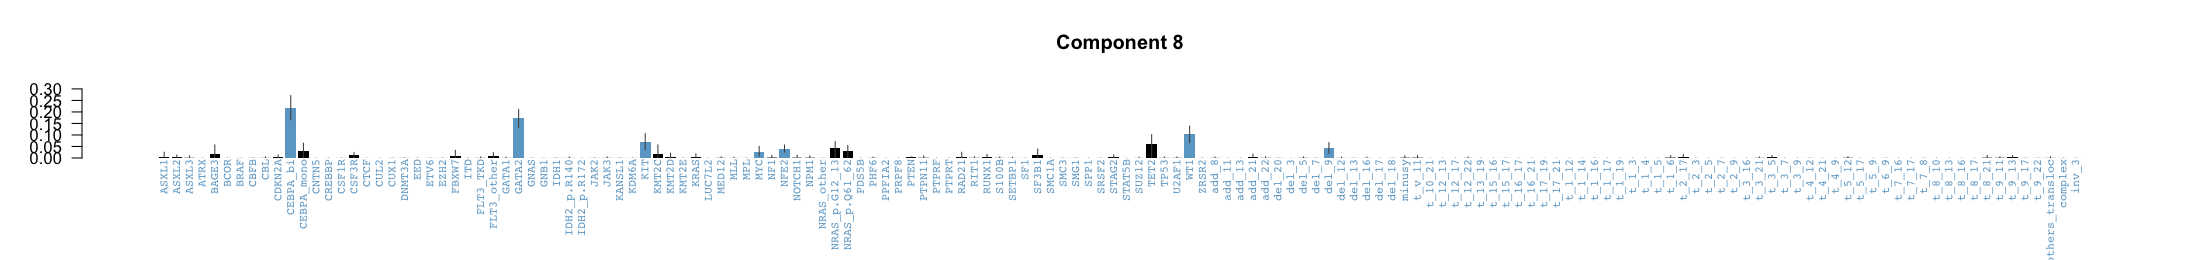

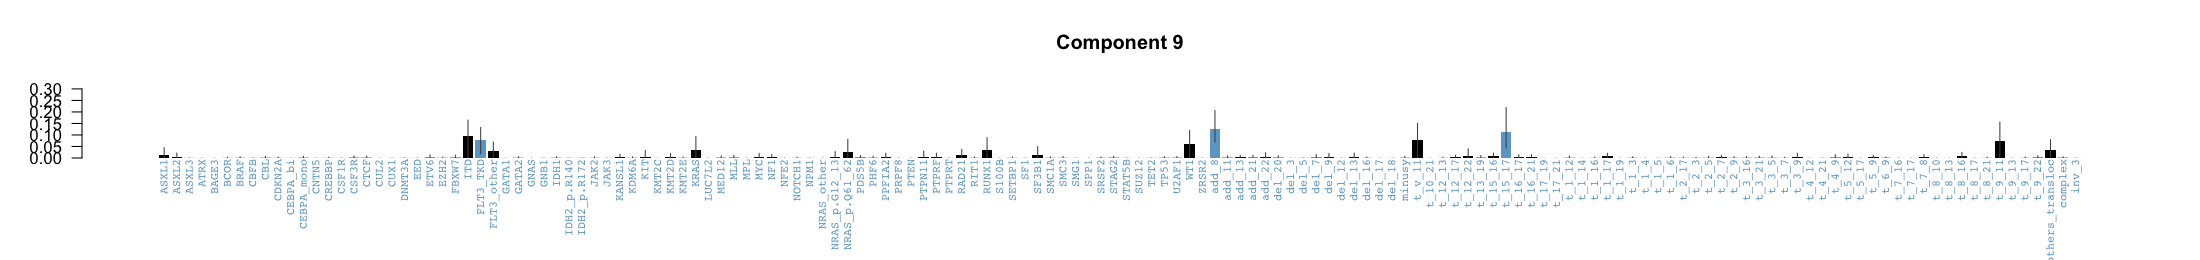

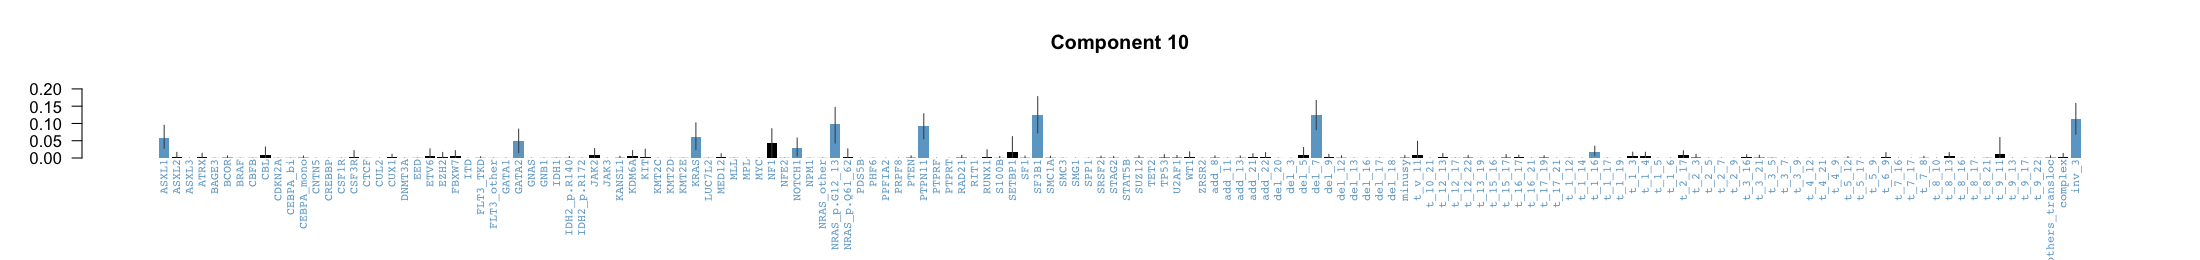

In [28]:
#plot_category_distribution_by_component(multi_output_cluster_10, colnames(df_final))
plot_components_size(multi_output_cluster_10,8,4.5)
set_notebook_plot_size(22, 2.6)
    plot_comp_distn(multi_output_cluster_10,
                    cat_names  = colnames(df_final),
                    col        = "skyblue3",
                    col_nonsig = "black",
                                         )

Number of components: 10
Number of NA rows   : 3


values      count freq             
2  1            858  40.974212034384  
3  2            410  19.5797516714422 
4  3            224  10.6972301814709 
5  4            115  5.49188156638013 
6  5            102  4.87106017191977 
7  6             81  3.86819484240688 
8  7             80  3.82043935052531 
10 9             73  3.48615090735435 
1  0             69  3.29512893982808 
9  8             50  2.38777459407832 
11 10            29  1.38490926456543 
12 NaN            3  0.143266475644699
13 -- total -- 2094  100%

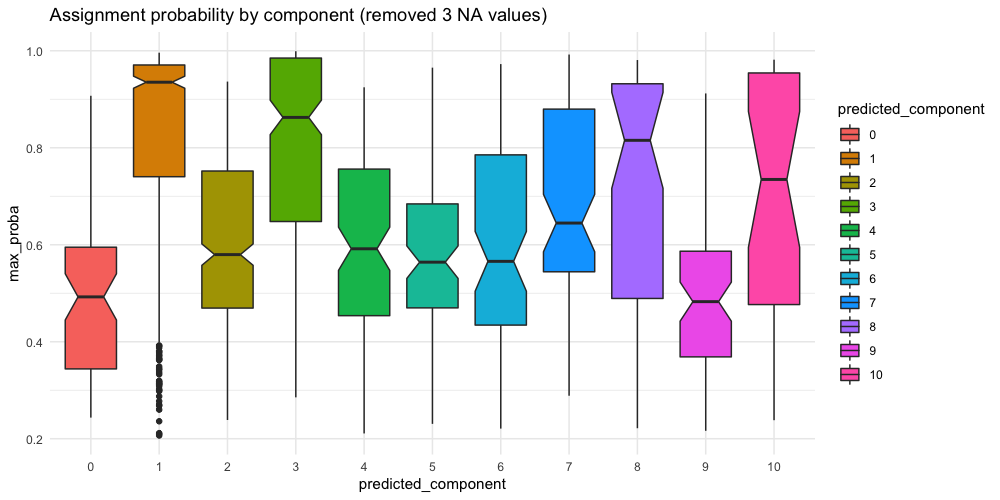

In [29]:
dd_predicted_10_components <- get_prediction_result_dataframe(multi_output_cluster_10, df_final)
get_table(dd_predicted_10_components[,'predicted_component'])
plot_assignement_probability_by_component(dd_predicted_10_components)

#### People assigned to NaN have no genetic and cytogenetic events (sum=0). We remove them from the analysis

##### Create a dataframe with initial patients and their initial component (without NAN patients)

Initialise HDP on a 2094 x 152 dataframe
  → create HDP structure... done!
  → add DP node for each patient... done!
  → assign the data to the nodes... done!
### Experiment 1 (seed = 100) ###
Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "7000 burn-in iterations in 0.4 mins"

### Experiment 2 (seed = 200) ###
Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "7000 burn-in iterations in 0.5 mins"

### Experiment 3 (seed = 300) ###
Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "7000 burn-in iterations in 0.4 mins"

Object of class hdpSampleMulti 
 Number of chains: 3 
 Total posterior samples: 750 
 Components: NO. Run hdp_extract_components 
 ----------
 Final hdpState from first chain: 
Object of class hdpState 
 Number of DP nodes: 2095 
 Index of parent DP: 0 1 1 1 1 1 1 1 1 1 ...
 Number of 

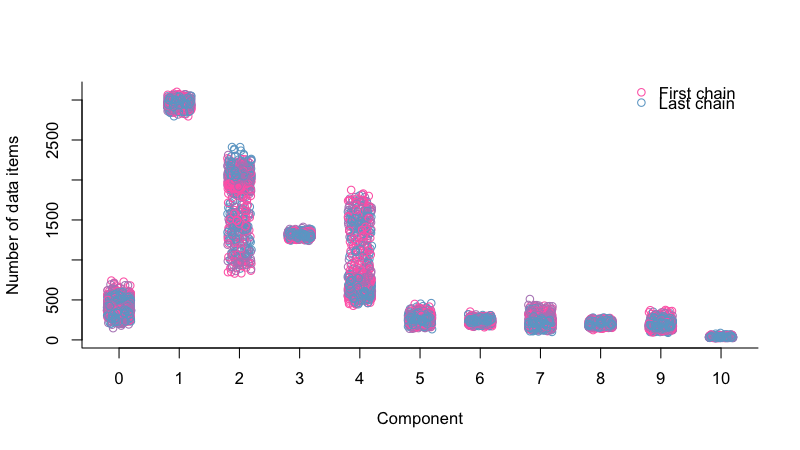

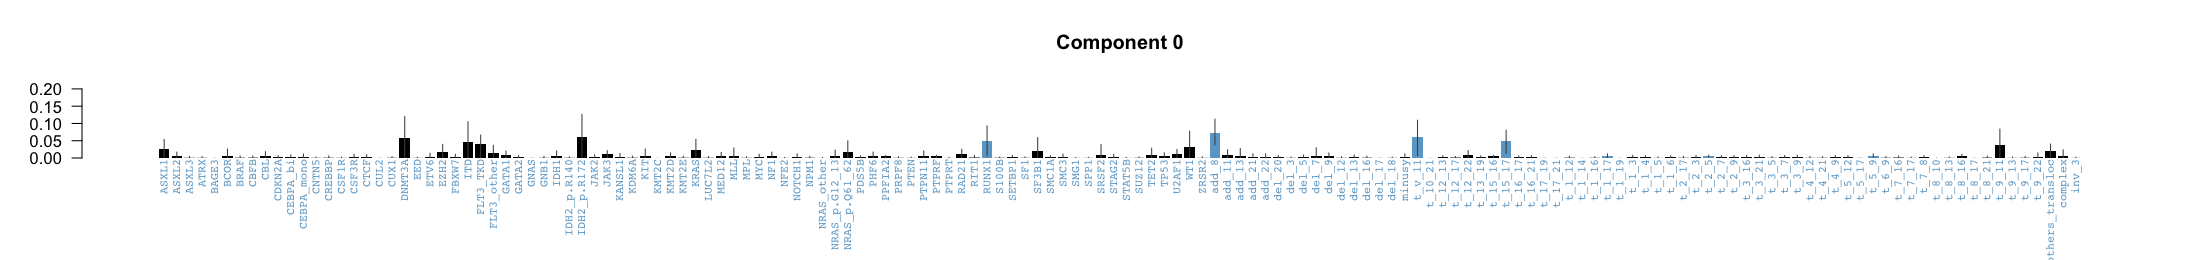

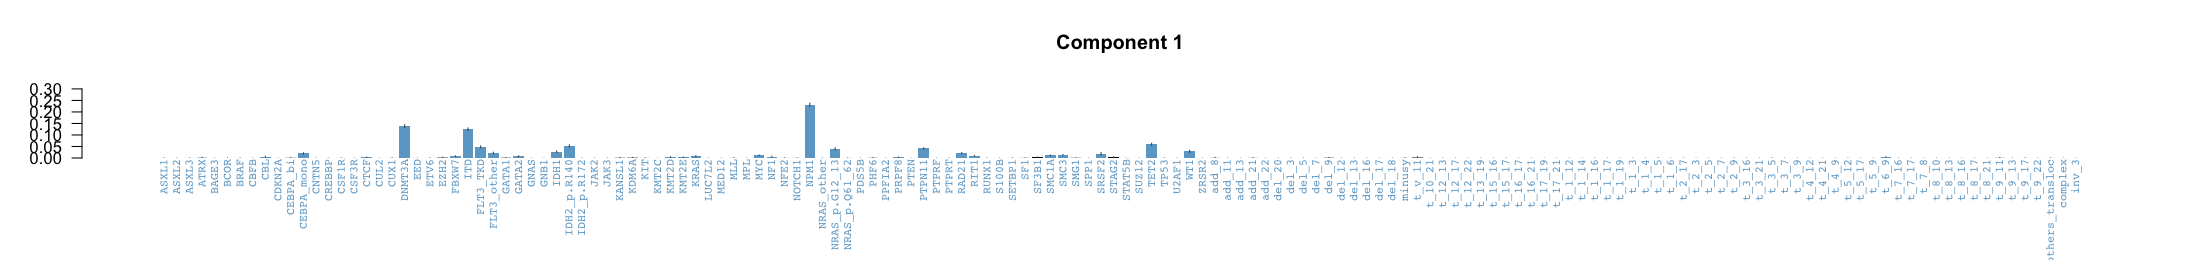

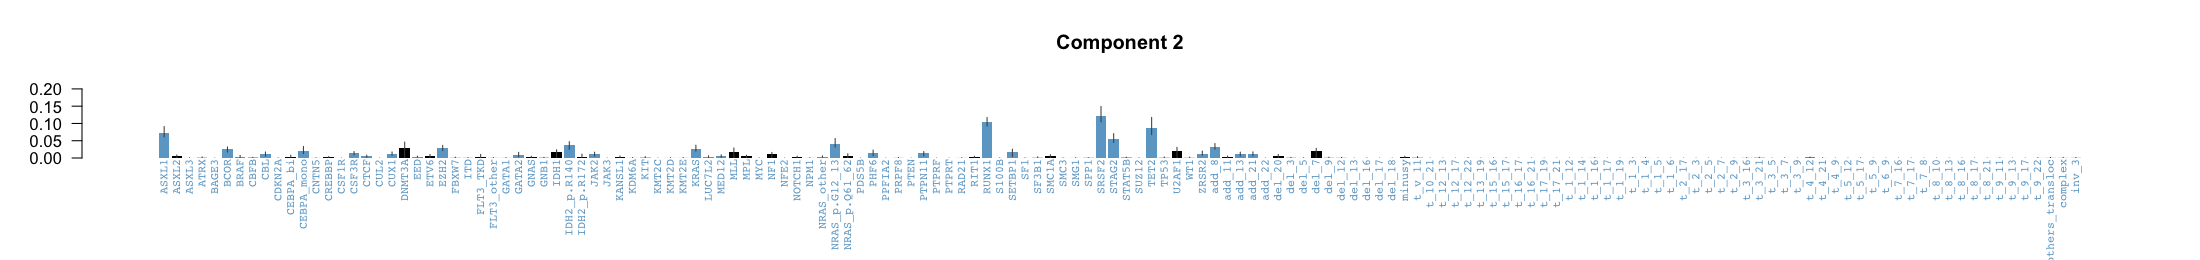

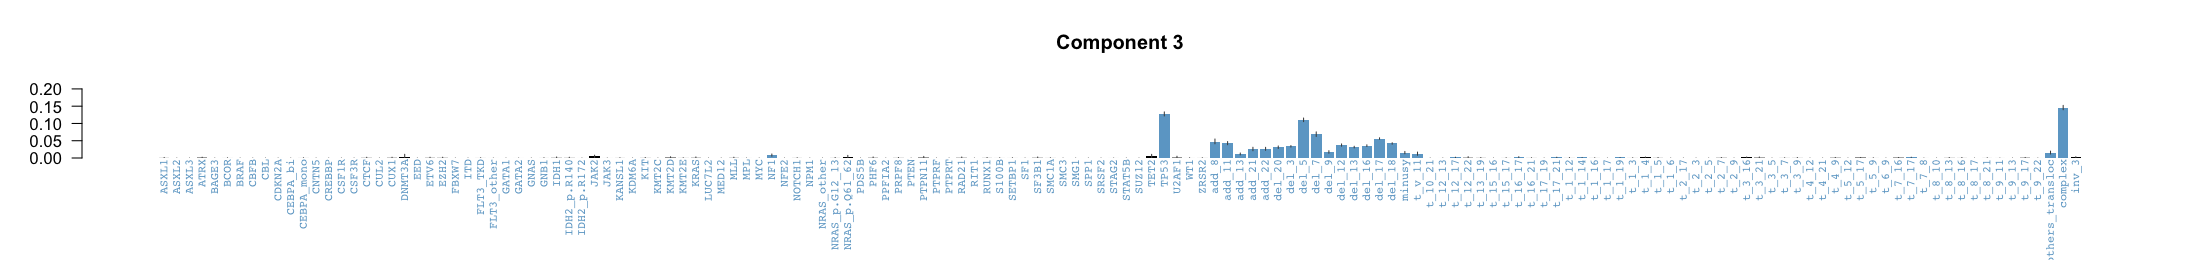

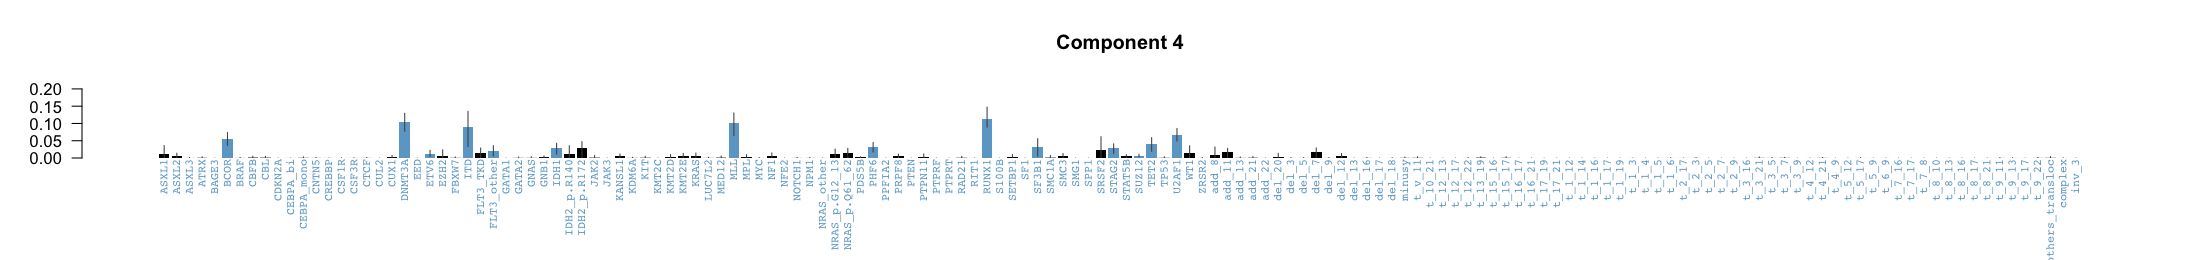

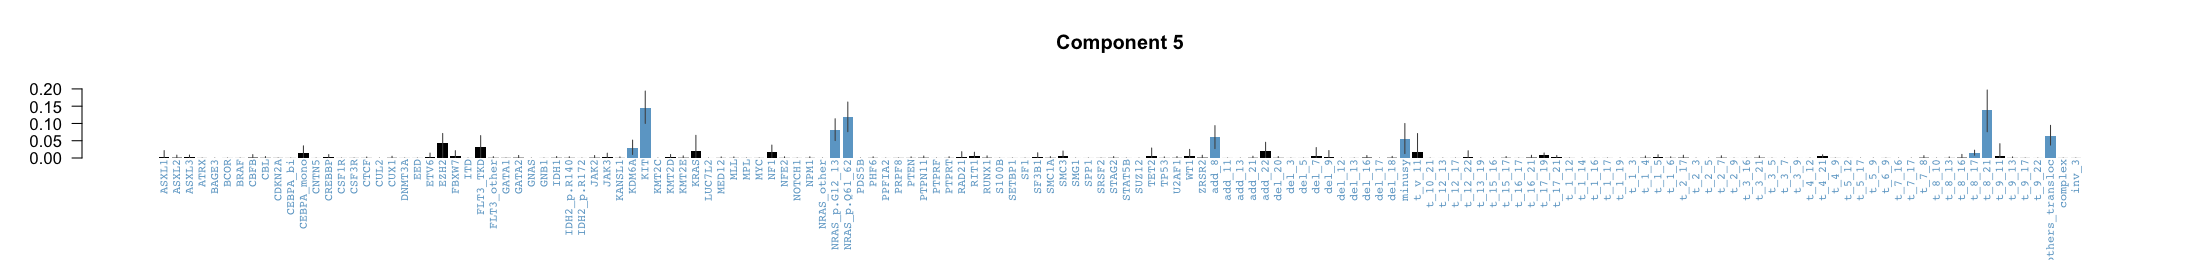

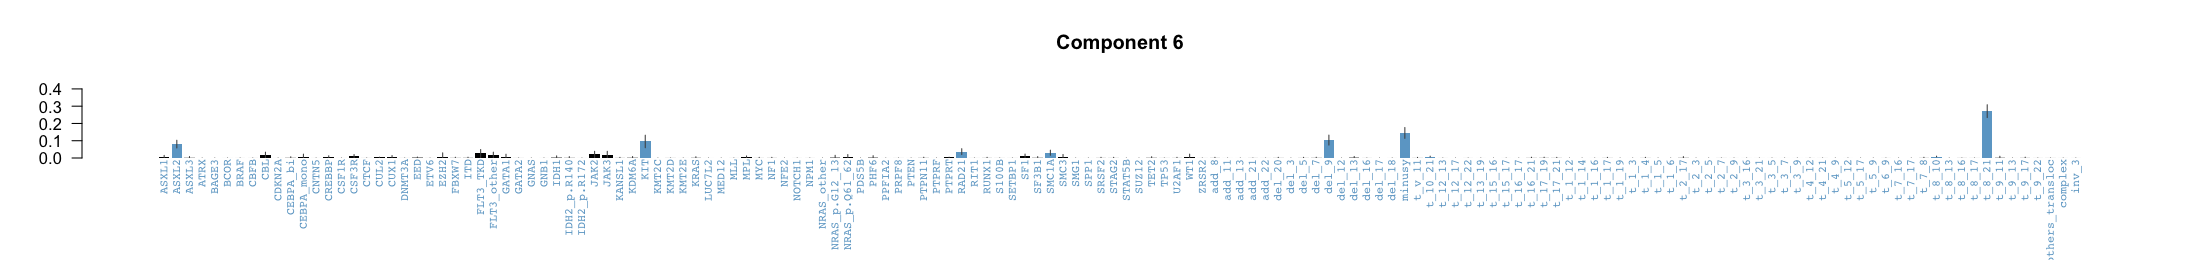

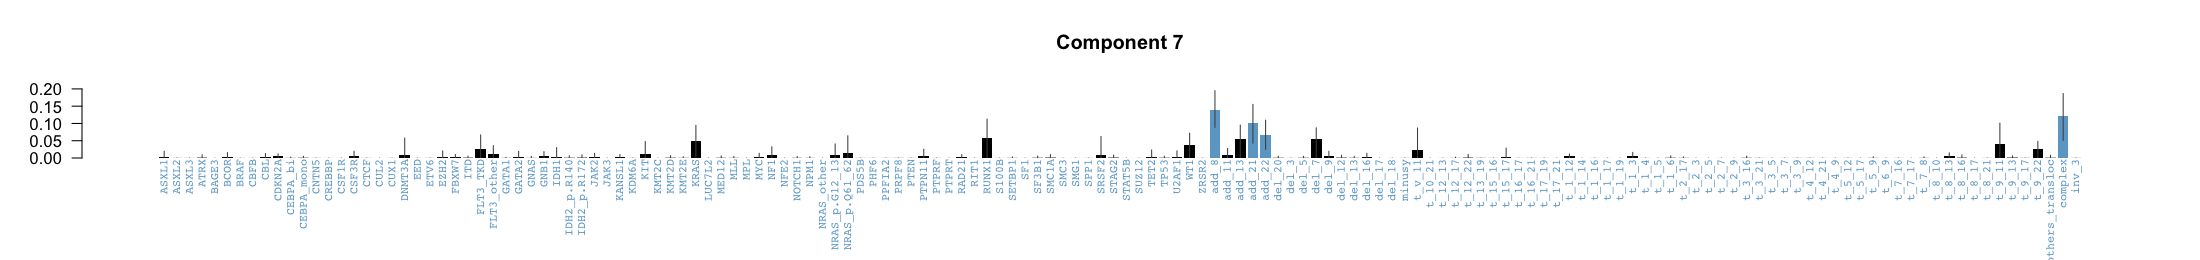

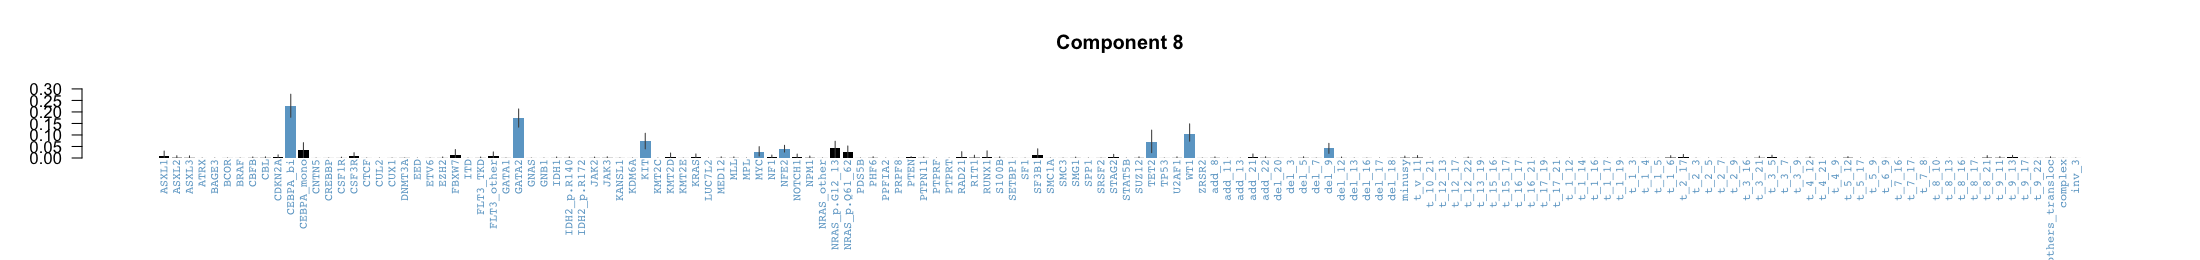

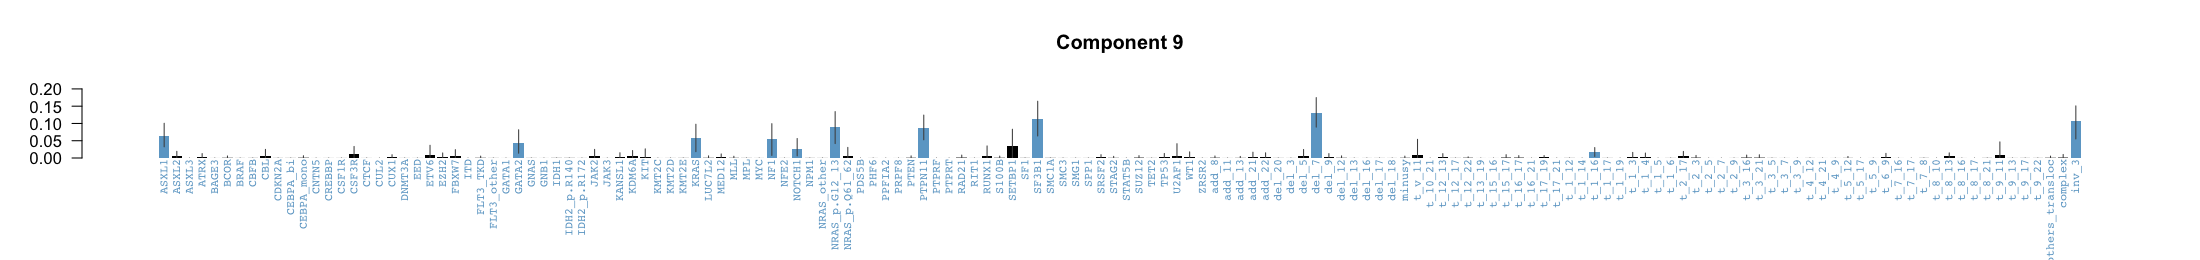

Number of components: 10
Number of NA rows   : 3


values      count freq             
2  1            850  40.5921680993314 
3  2            427  20.3915950334288 
4  3            224  10.6972301814709 
5  4            171  8.16618911174785 
1  0            131  6.2559694364852  
6  5             80  3.82043935052531 
7  6             78  3.72492836676218 
9  8             48  2.29226361031519 
8  7             42  2.00573065902579 
10 9             33  1.57593123209169 
11 10             7  0.334288443170965
12 NaN            3  0.143266475644699
13 -- total -- 2094  100%

notch went outside hinges. Try setting notch=FALSE.
notch went outside hinges. Try setting notch=FALSE.


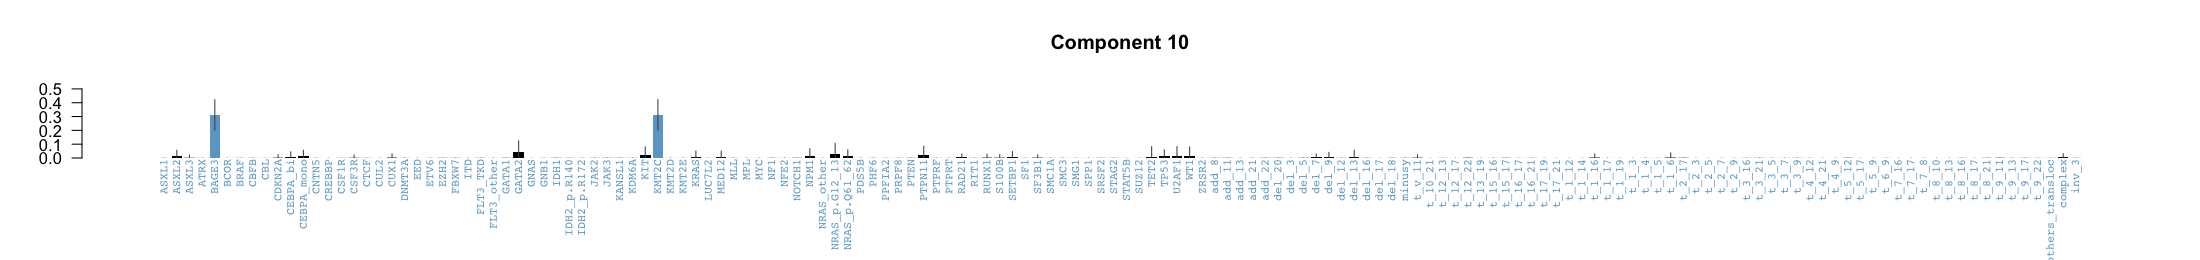

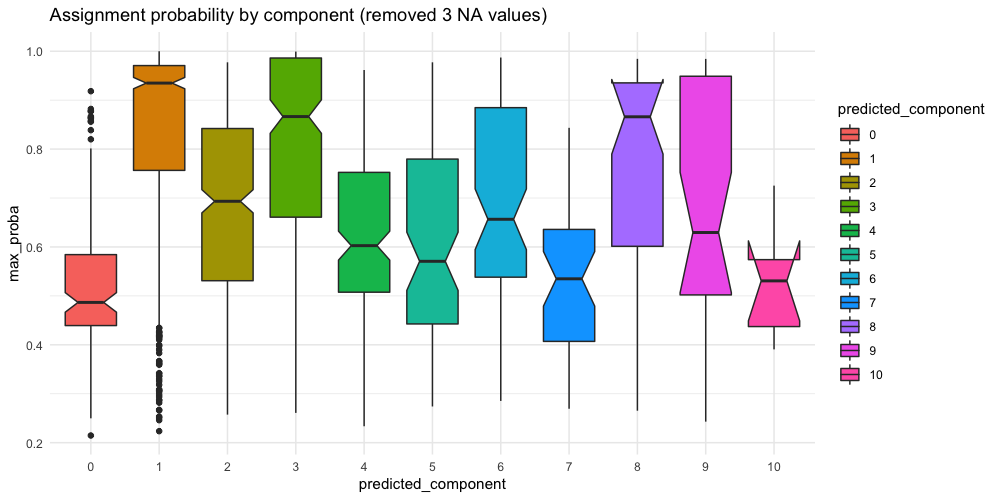

In [32]:
data <- df_final
posterior_samples <- 250
initial_clusters <- 17
burn <- 7000
chains <- 3
base_dist <- gaussian
aa <- 2.5
ab <- 1

multi_output <- launch(data,base_dist,initial_clusters,burn,posterior_samples,chains,aa,ab)
multi_output_cluster_10 <- extract_components(multi_output)

plot_components_size(multi_output_cluster_10,8,4.5)
set_notebook_plot_size(22, 2.6)
    plot_comp_distn(multi_output_cluster_10,
                    cat_names  = colnames(df_final),
                    col        = "skyblue3",
                    col_nonsig = "black",
                                         )

dd_predicted_10_components <- get_prediction_result_dataframe(multi_output_cluster_10, df_final)
get_table(dd_predicted_10_components[,'predicted_component'])
plot_assignement_probability_by_component(dd_predicted_10_components)

Initialise HDP on a 2094 x 152 dataframe
  → create HDP structure... done!
  → add DP node for each patient... done!
  → assign the data to the nodes... done!
### Experiment 1 (seed = 100) ###
Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "7000 burn-in iterations in 0.4 mins"

### Experiment 2 (seed = 200) ###
Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "7000 burn-in iterations in 0.4 mins"

### Experiment 3 (seed = 300) ###
Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "7000 burn-in iterations in 0.5 mins"

Object of class hdpSampleMulti 
 Number of chains: 3 
 Total posterior samples: 750 
 Components: NO. Run hdp_extract_components 
 ----------
 Final hdpState from first chain: 
Object of class hdpState 
 Number of DP nodes: 2095 
 Index of parent DP: 0 1 1 1 1 1 1 1 1 1 ...
 Number of 

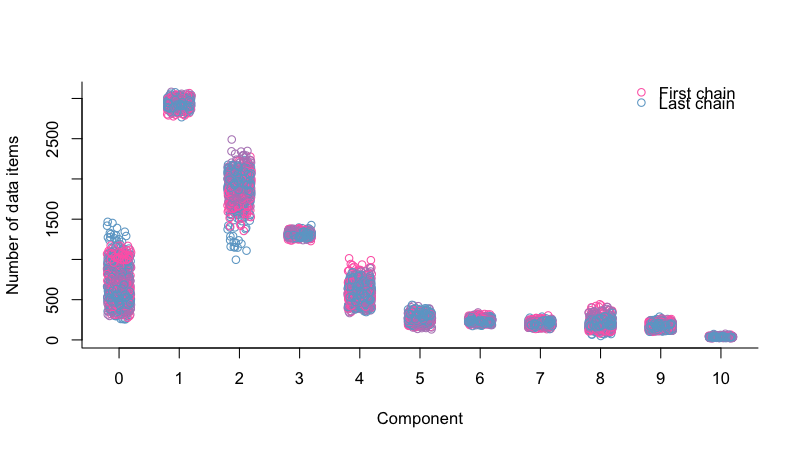

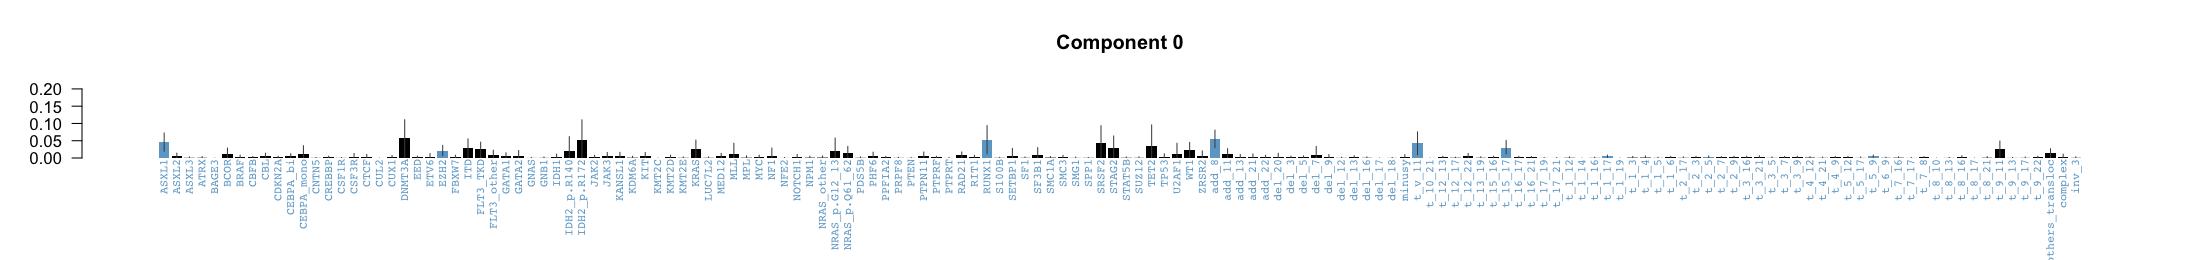

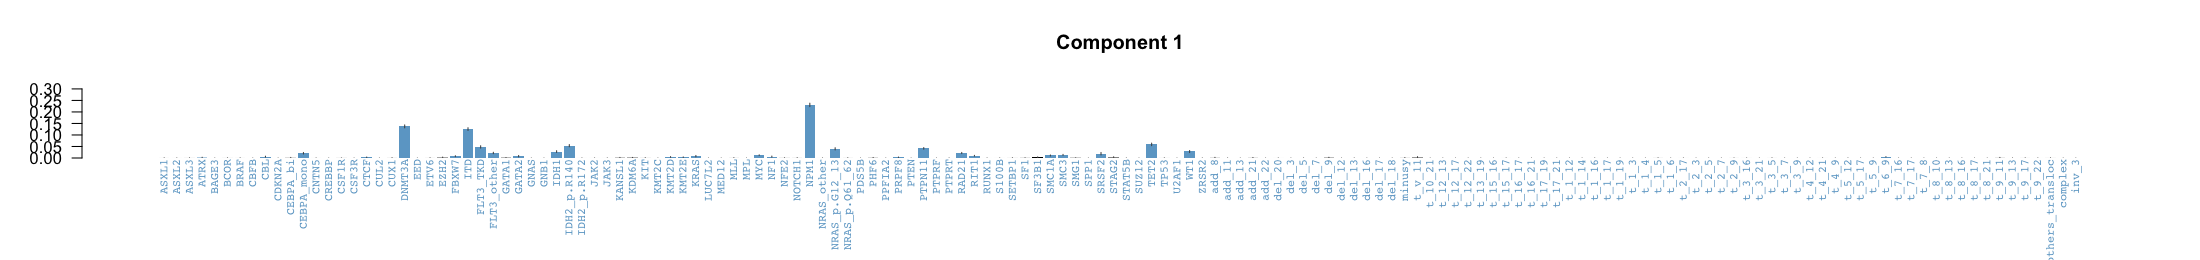

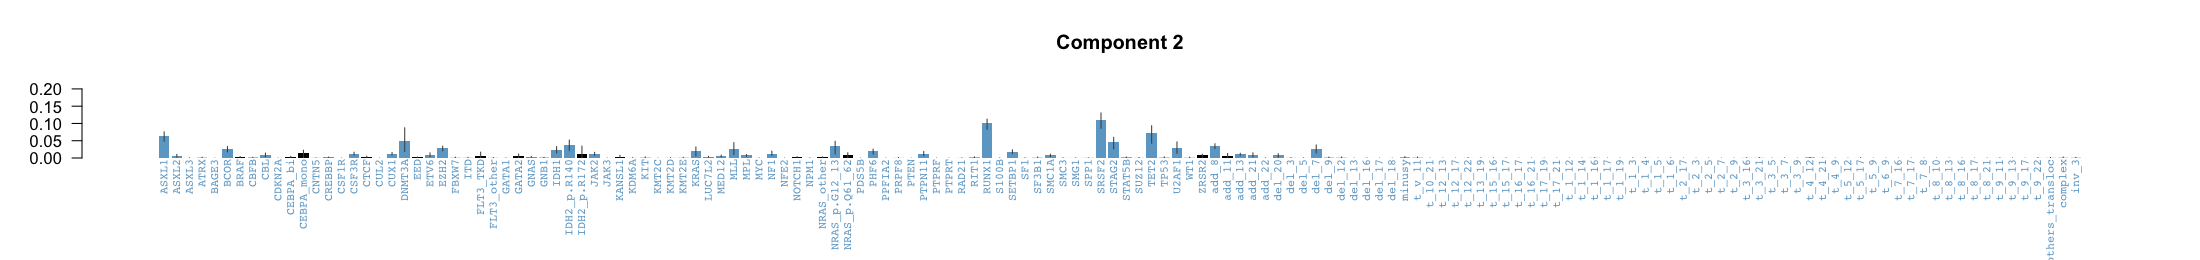

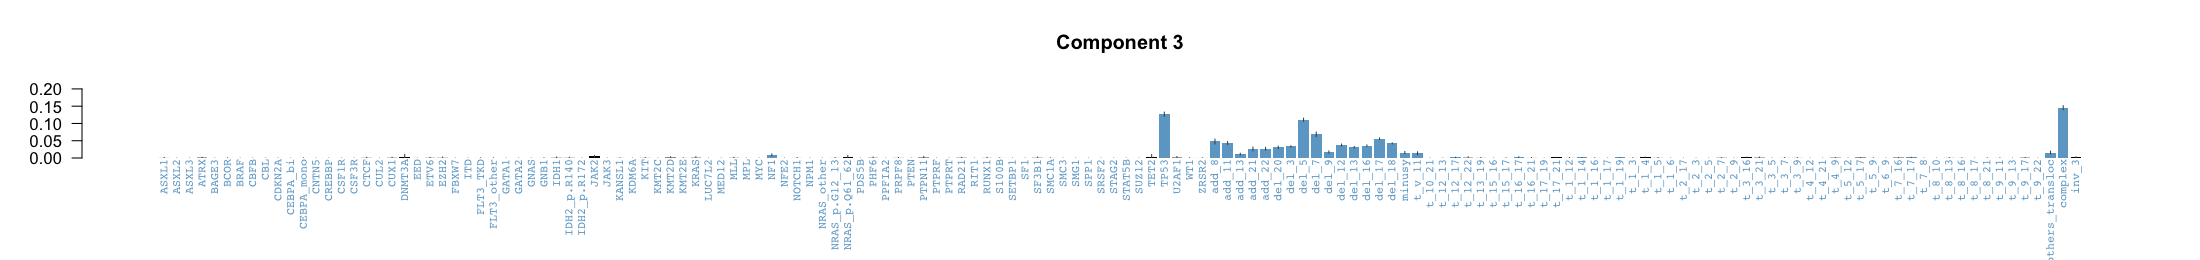

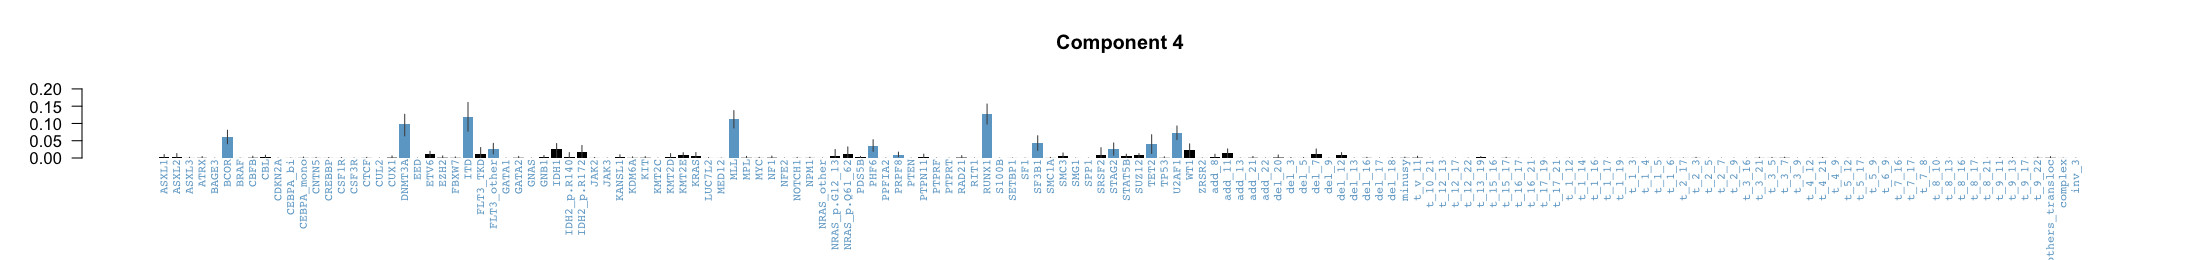

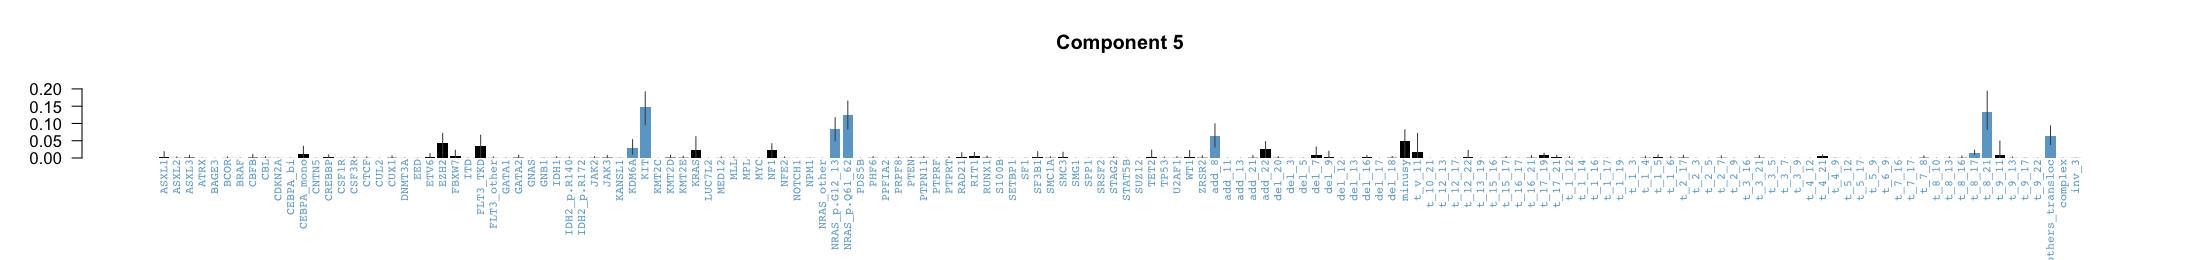

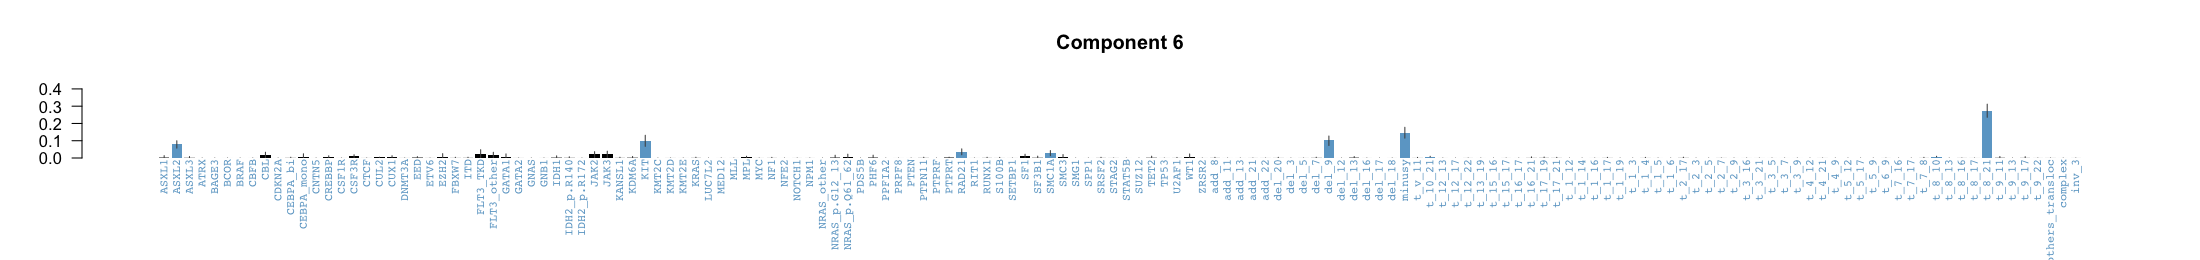

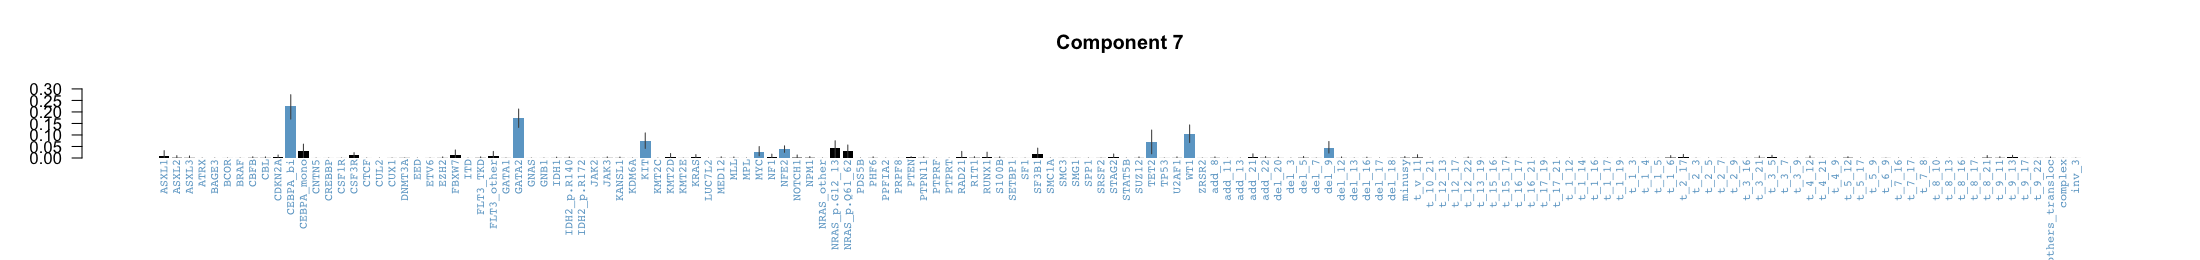

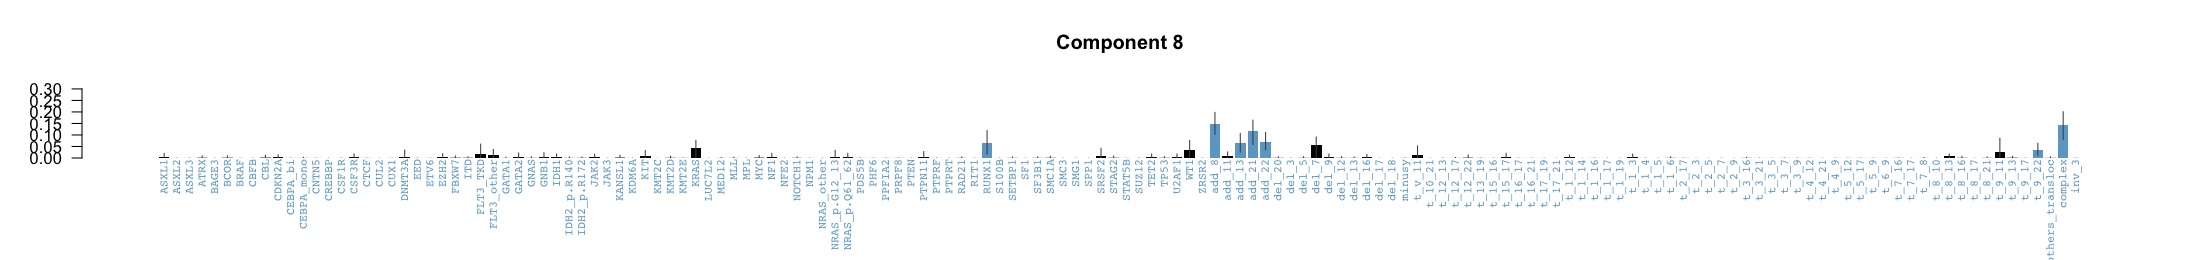

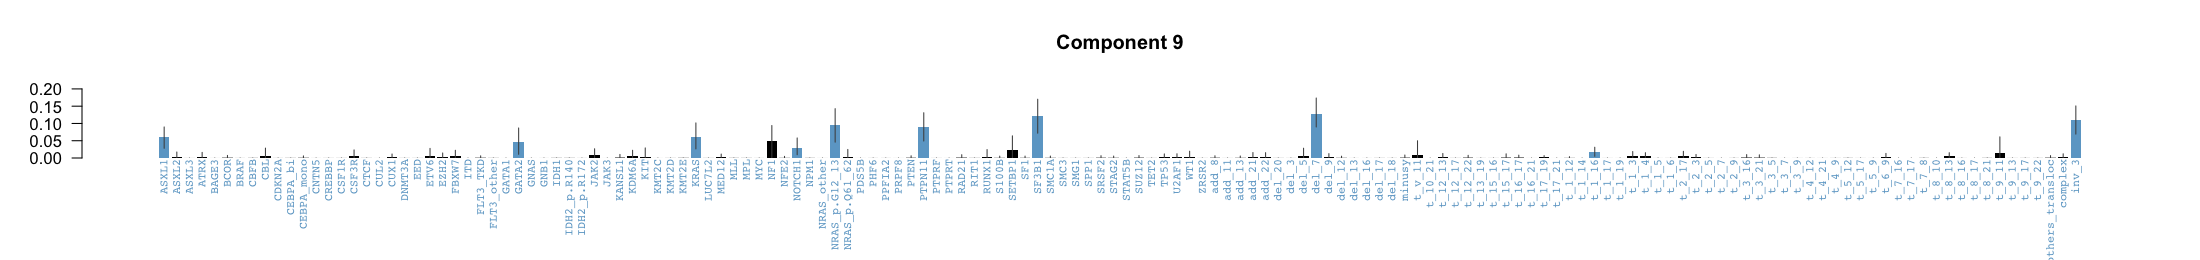

Number of components: 10
Number of NA rows   : 3


values      count freq             
2  1            848  40.4966571155683 
3  2            475  22.683858643744  
4  3            225  10.7449856733524 
1  0            142  6.78127984718243 
5  4            117  5.58739255014327 
6  5             79  3.77268385864374 
7  6             78  3.72492836676218 
8  7             50  2.38777459407832 
9  8             35  1.67144221585482 
10 9             35  1.67144221585482 
11 10             7  0.334288443170965
12 NaN            3  0.143266475644699
13 -- total -- 2094  100%

notch went outside hinges. Try setting notch=FALSE.
notch went outside hinges. Try setting notch=FALSE.


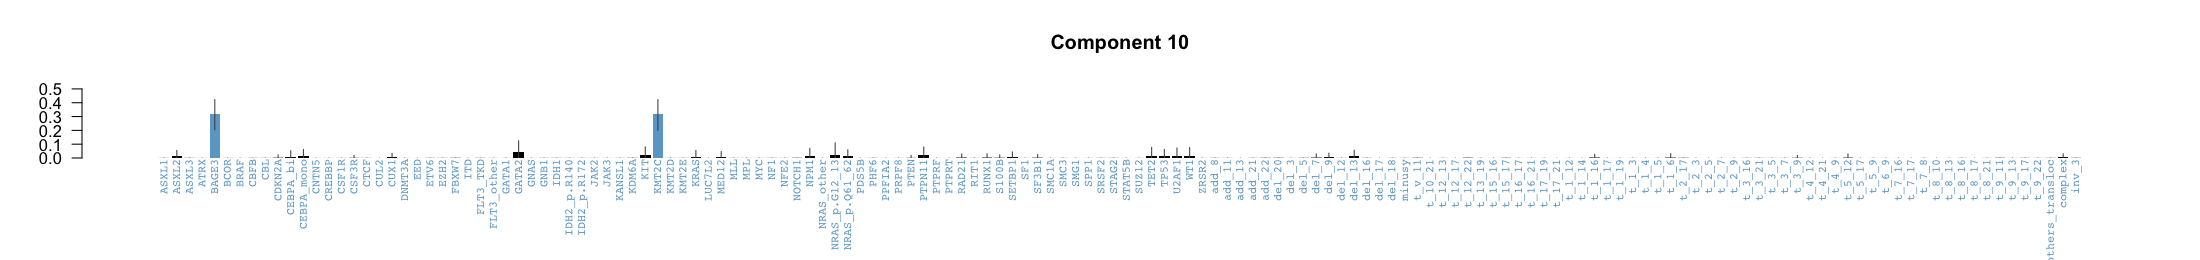

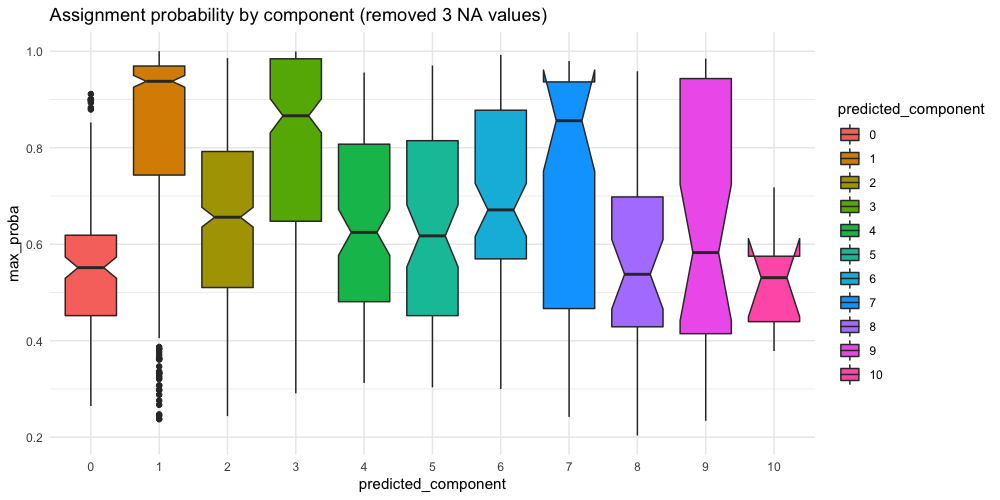

In [35]:
data <- df_final
posterior_samples <- 250
initial_clusters <- 20
burn <- 7000
chains <- 3
base_dist <- gaussian
aa <- 2.5
ab <- 0.5

multi_output <- launch(data,base_dist,initial_clusters,burn,posterior_samples,chains,aa,ab)
multi_output_cluster_10 <- extract_components(multi_output)

plot_components_size(multi_output_cluster_10,8,4.5)
set_notebook_plot_size(22, 2.6)
    plot_comp_distn(multi_output_cluster_10,
                    cat_names  = colnames(df_final),
                    col        = "skyblue3",
                    col_nonsig = "black",
                                         )

dd_predicted_10_components <- get_prediction_result_dataframe(multi_output_cluster_10, df_final)
get_table(dd_predicted_10_components[,'predicted_component'])
plot_assignement_probability_by_component(dd_predicted_10_components)

Initialise HDP on a 2094 x 152 dataframe
  → create HDP structure... done!
  → add DP node for each patient... done!
  → assign the data to the nodes... done!
### Experiment 1 (seed = 100) ###
Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "7000 burn-in iterations in 0.4 mins"

### Experiment 2 (seed = 200) ###
Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "7000 burn-in iterations in 0.4 mins"

### Experiment 3 (seed = 300) ###
Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "7000 burn-in iterations in 0.5 mins"

Object of class hdpSampleMulti 
 Number of chains: 3 
 Total posterior samples: 750 
 Components: NO. Run hdp_extract_components 
 ----------
 Final hdpState from first chain: 
Object of class hdpState 
 Number of DP nodes: 2095 
 Index of parent DP: 0 1 1 1 1 1 1 1 1 1 ...
 Number of 

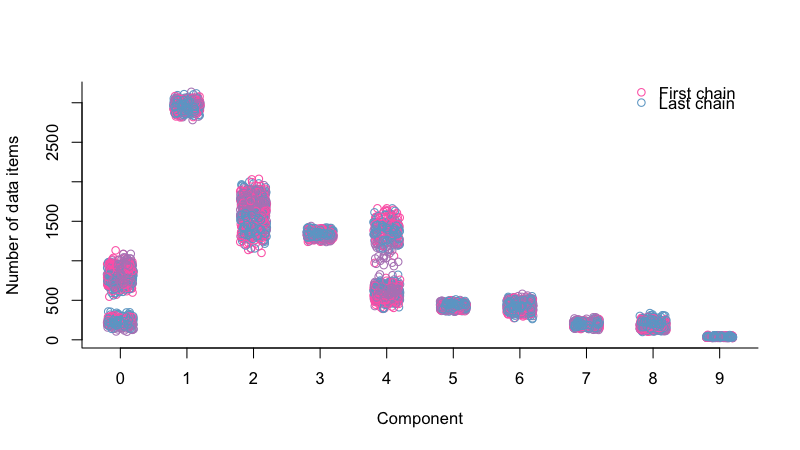

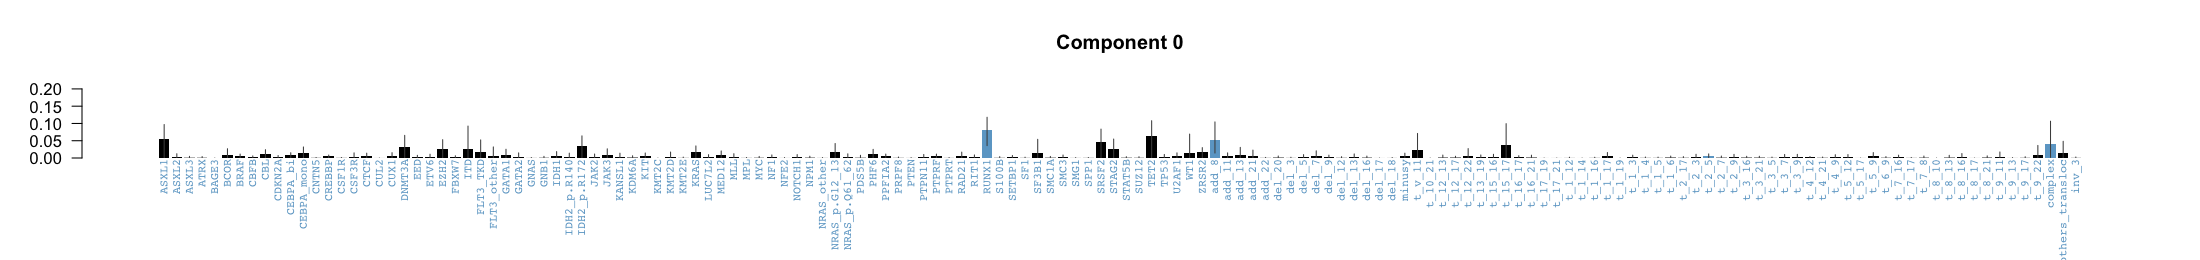

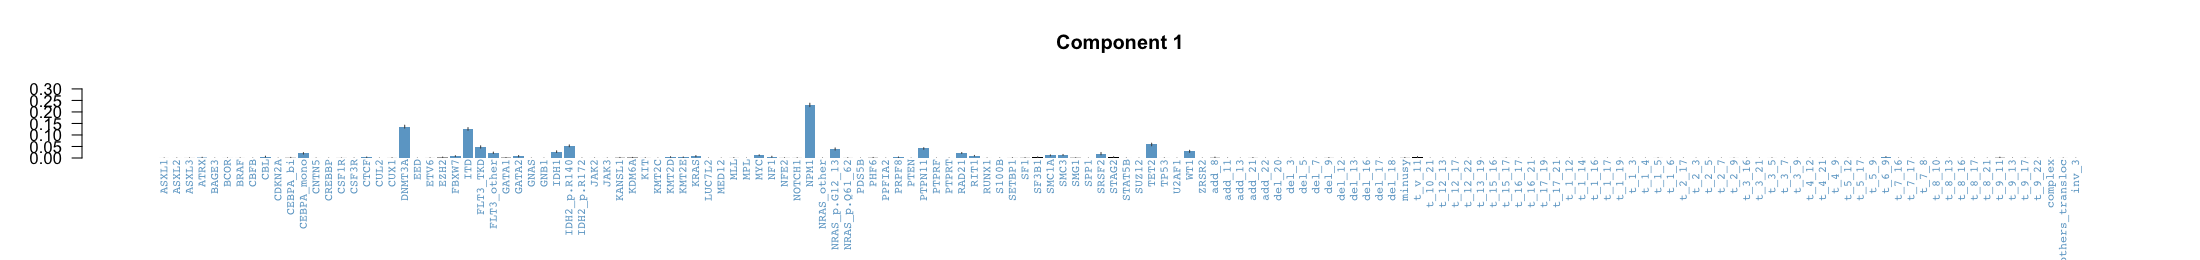

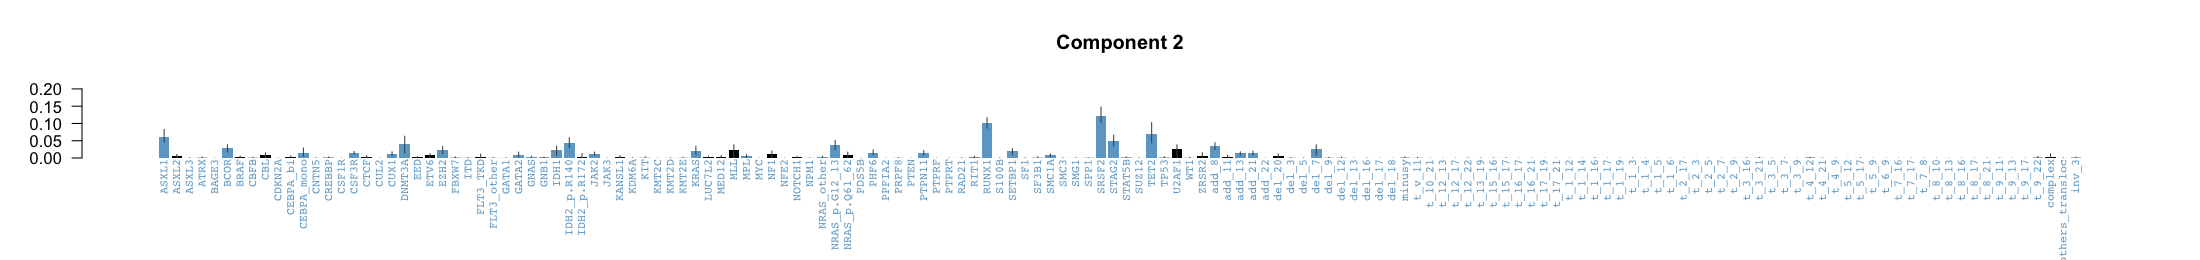

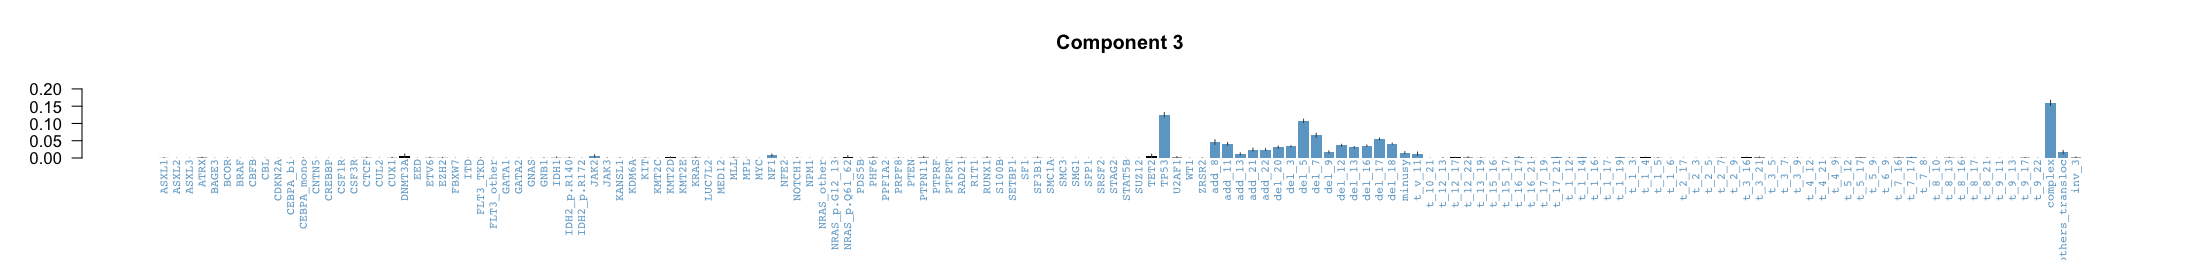

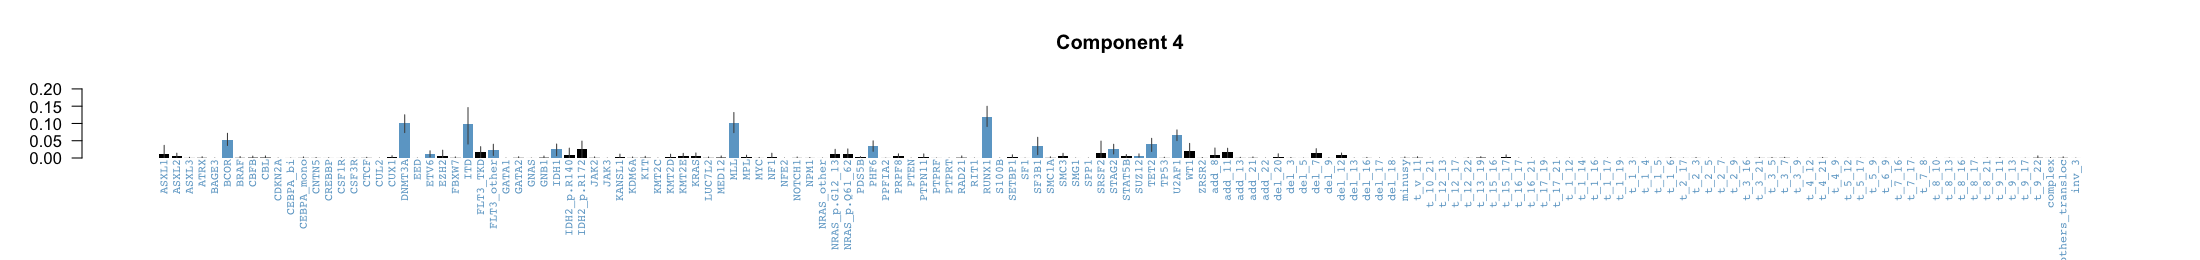

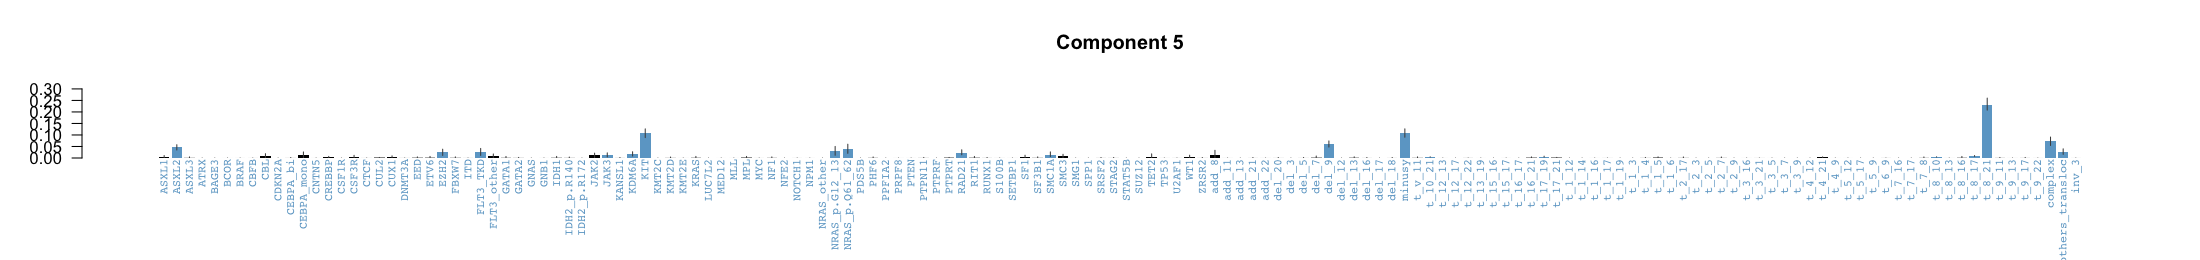

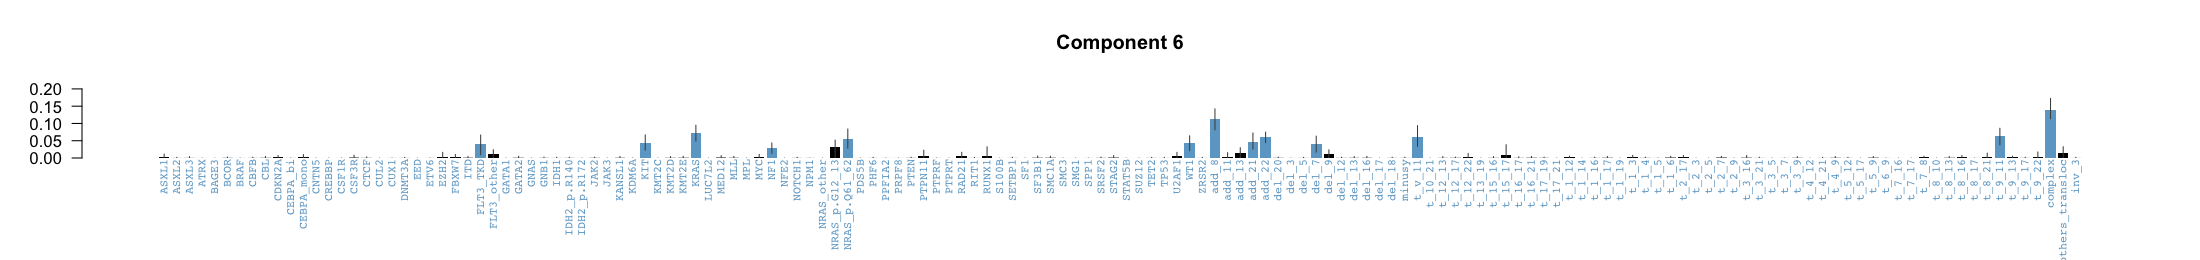

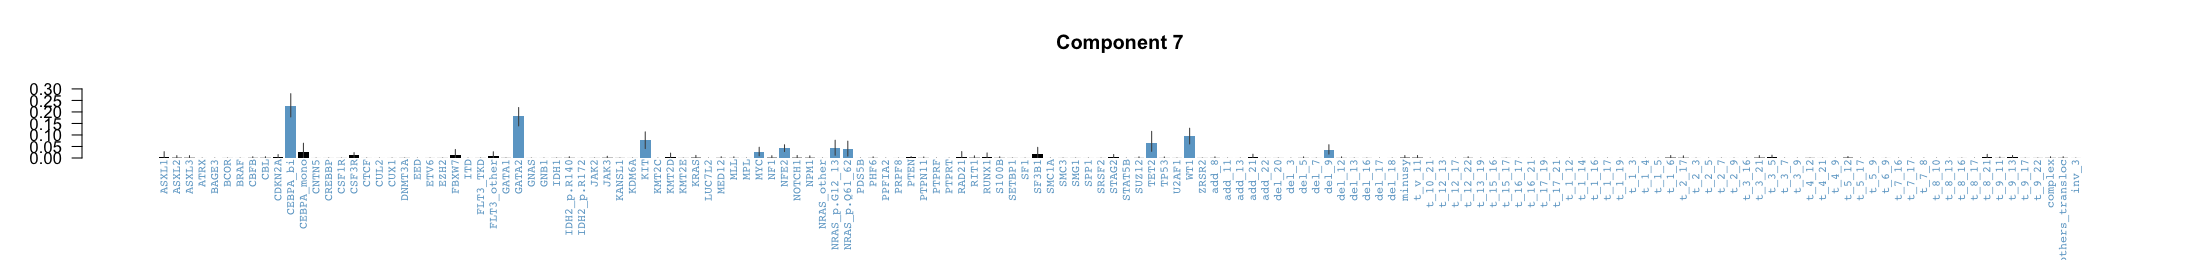

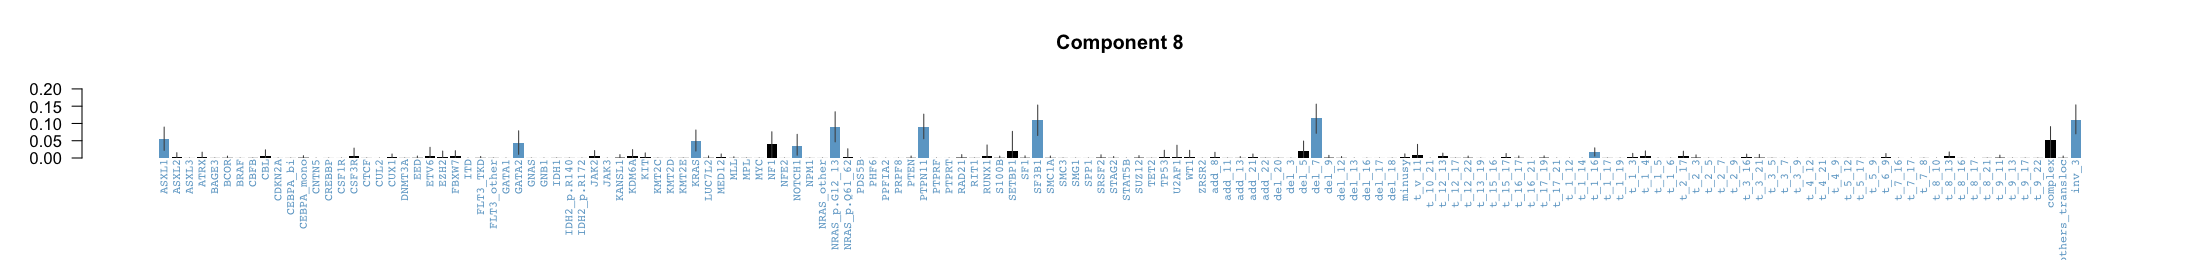

Number of components: 9
Number of NA rows   : 0


values      count freq             
2  1            851  40.639923591213  
3  2            382  18.2425978987584 
4  3            225  10.7449856733524 
5  4            171  8.16618911174785 
6  5            130  6.20821394460363 
7  6            127  6.06494746895893 
1  0            120  5.73065902578797 
8  7             46  2.19675262655205 
9  8             35  1.67144221585482 
10 9              7  0.334288443170965
11 -- total -- 2094  100%

notch went outside hinges. Try setting notch=FALSE.


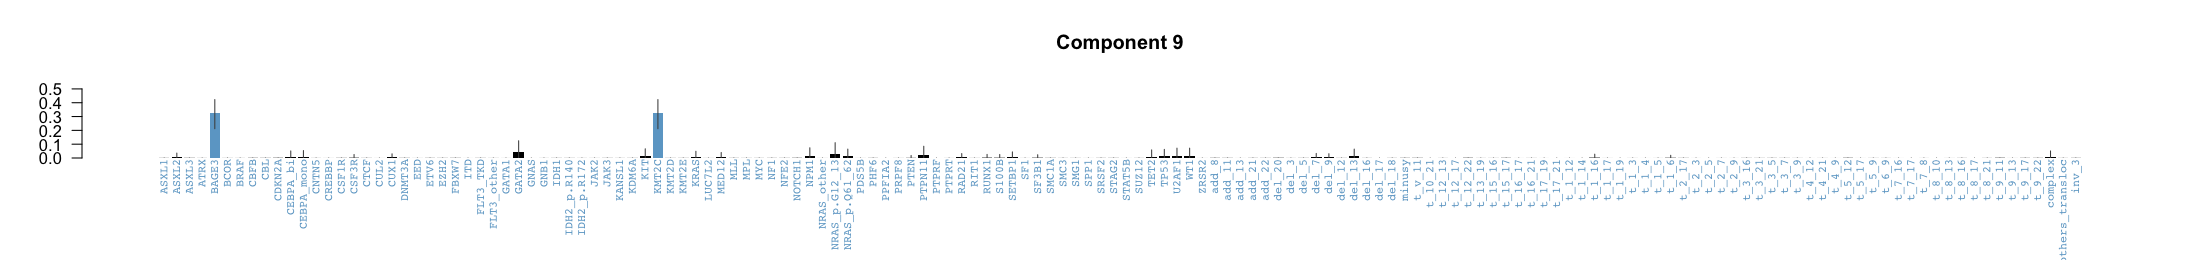

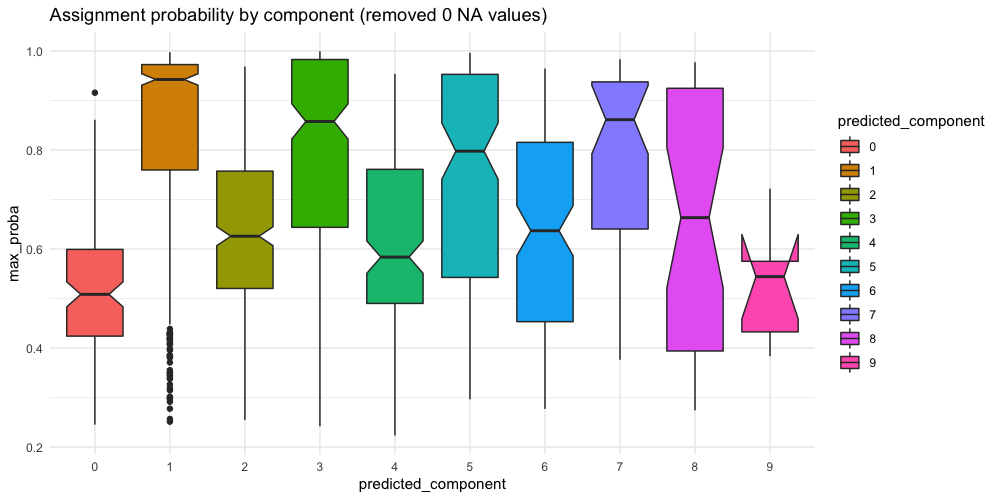

In [43]:
df_final <- read.table("../../../data/updated_dataset/modif_final.csv",sep = ',' , header = T)
rownames(df_final)<- df_final$data_pd
df_final <- df_final[,-1:-3]

#df_final <-
#head(data.frame(read.table("../finalization_clustering/all_components_with_second_complex_inv3.tsv")))
df_final <- merge(df_final,read.table("../finalization_clustering/all_components_with_second_complex_inv3.tsv")[,156:157],by=0)
df_final <- df_final[,-1]
df_final <- df_final[,-length(colnames(df_final))]
data <- df_final
posterior_samples <- 250
initial_clusters <- 20
burn <- 7000
chains <- 3
base_dist <- gaussian
aa <- 2
ab <- 0.5

multi_output <- launch(data,base_dist,initial_clusters,burn,posterior_samples,chains,aa,ab)
multi_output_cluster_10 <- extract_components(multi_output)

plot_components_size(multi_output_cluster_10,8,4.5)
set_notebook_plot_size(22, 2.6)
    plot_comp_distn(multi_output_cluster_10,
                    cat_names  = colnames(df_final),
                    col        = "skyblue3",
                    col_nonsig = "black",
                                         )

dd_predicted_10_components <- get_prediction_result_dataframe(multi_output_cluster_10, df_final)
get_table(dd_predicted_10_components[,'predicted_component'])
plot_assignement_probability_by_component(dd_predicted_10_components)

Initialise HDP on a 2094 x 152 dataframe
  → create HDP structure... done!
  → add DP node for each patient... done!
  → assign the data to the nodes... done!
### Experiment 1 (seed = 100) ###
Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "7000 burn-in iterations in 0.4 mins"

### Experiment 2 (seed = 200) ###
Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "7000 burn-in iterations in 0.4 mins"

### Experiment 3 (seed = 300) ###
Activate HDP nodes and run posterior sampling
  → activate HDP nodes... done!
  → run posterior sampling...
[1] "7000 burn-in iterations in 0.4 mins"

Object of class hdpSampleMulti 
 Number of chains: 3 
 Total posterior samples: 750 
 Components: NO. Run hdp_extract_components 
 ----------
 Final hdpState from first chain: 
Object of class hdpState 
 Number of DP nodes: 2095 
 Index of parent DP: 0 1 1 1 1 1 1 1 1 1 ...
 Number of 

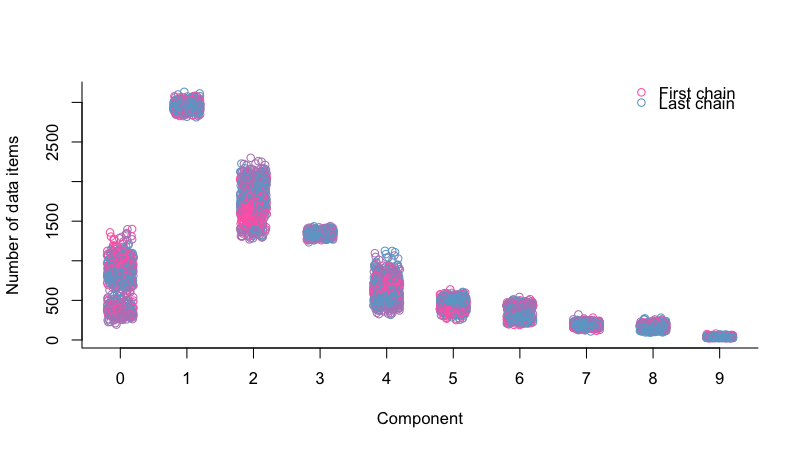

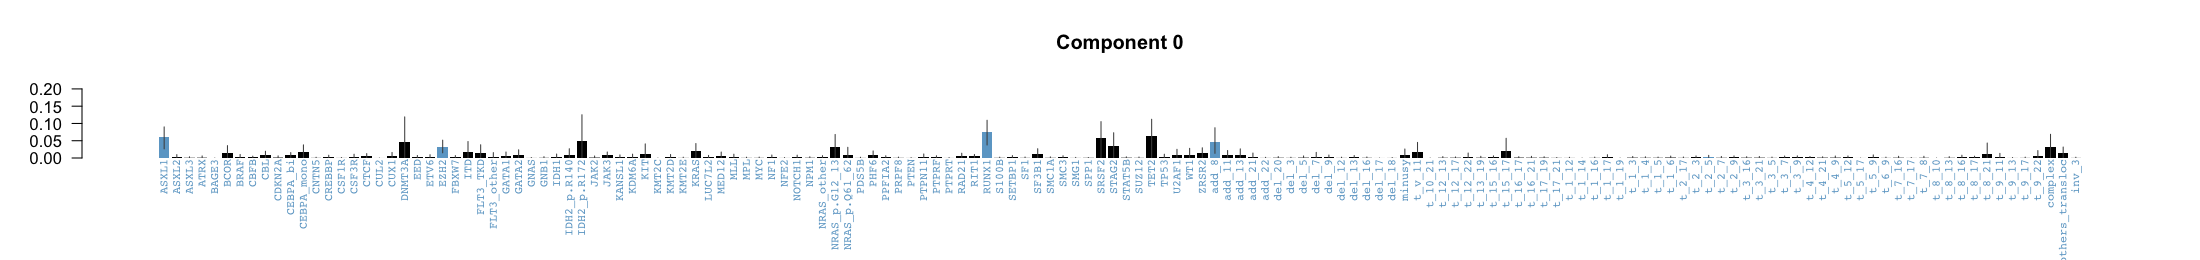

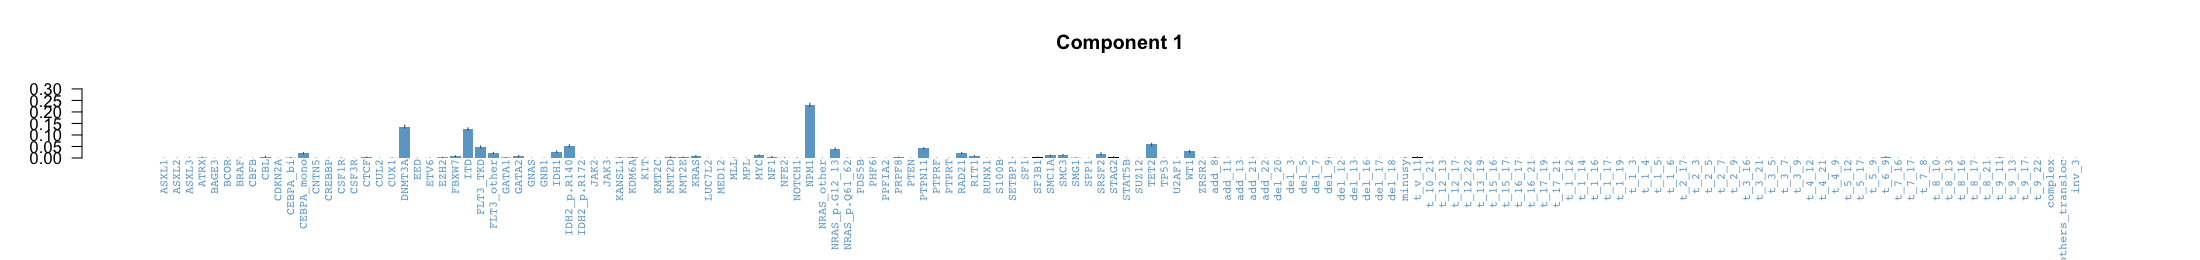

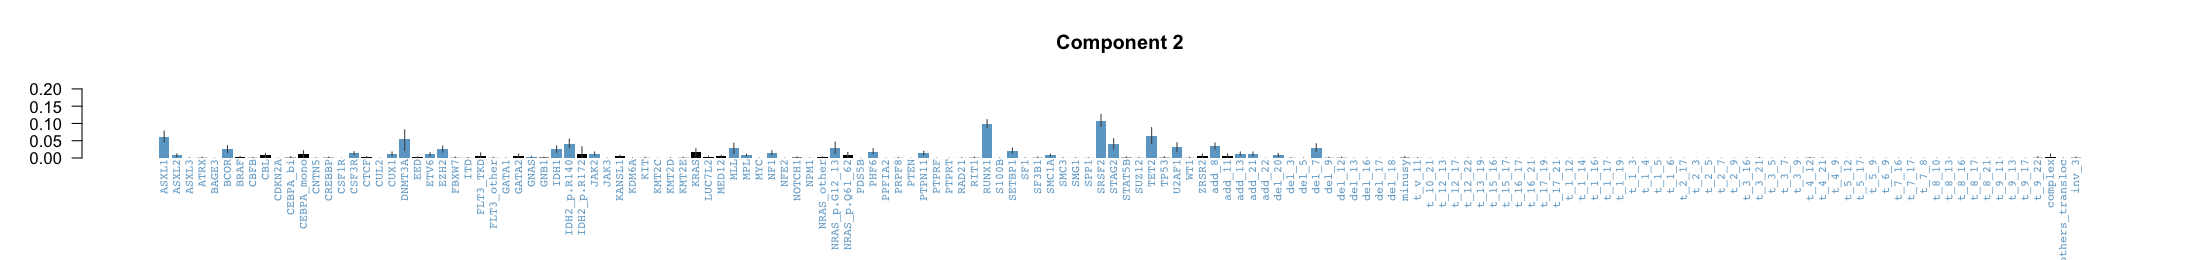

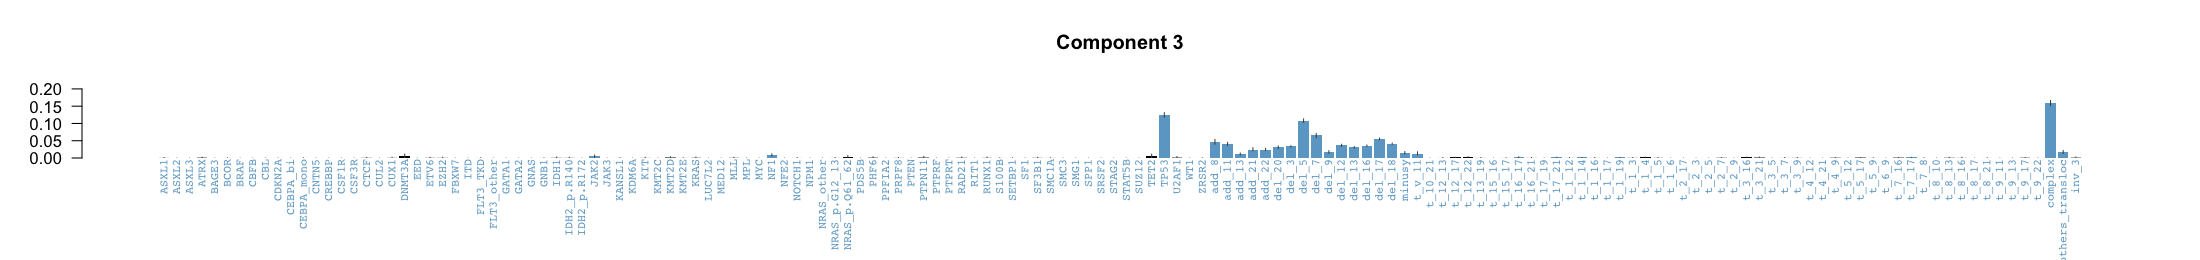

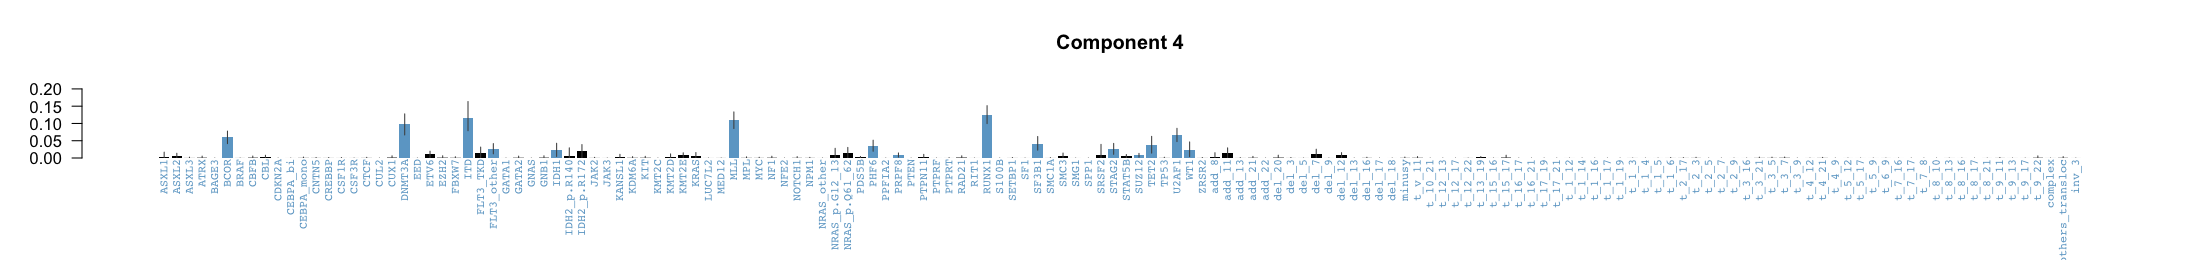

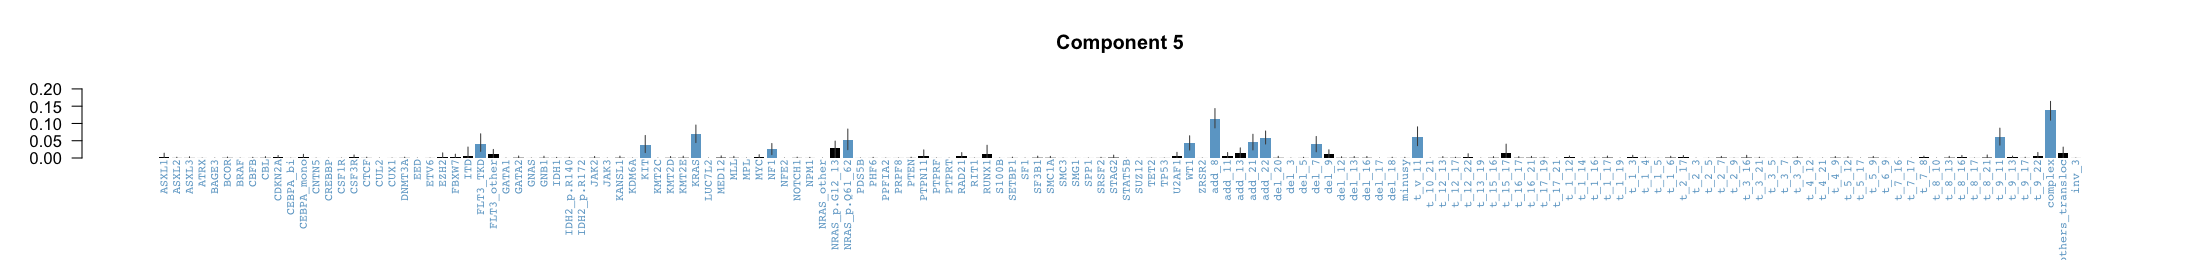

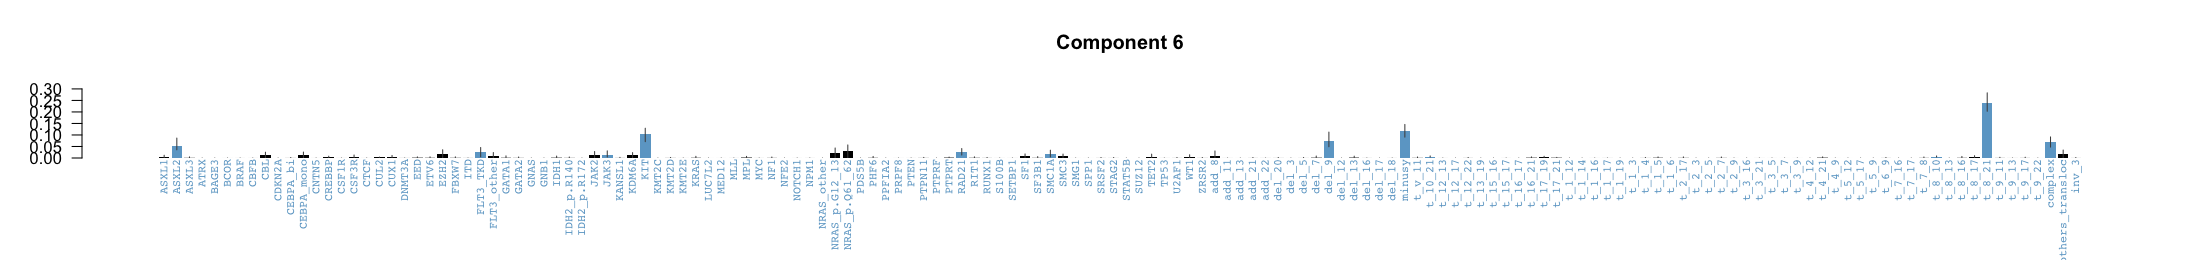

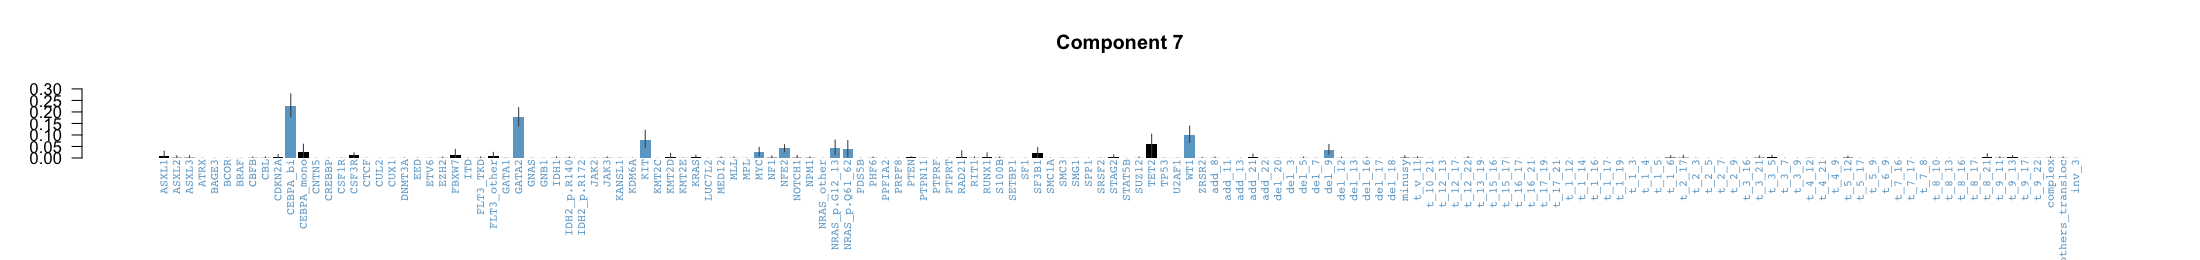

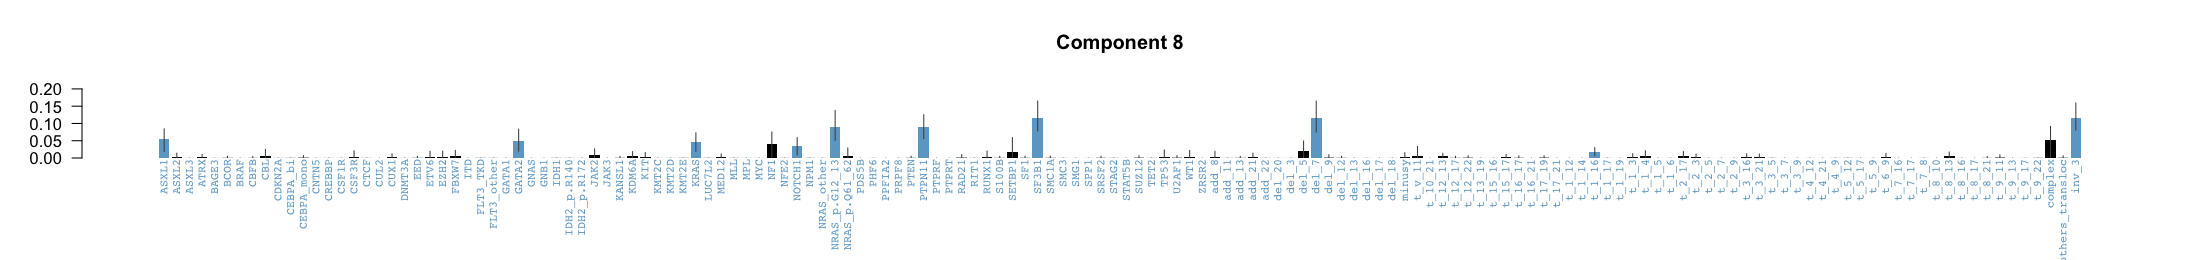

Number of components: 9
Number of NA rows   : 0


values      count freq             
2  1            849  40.5444126074499 
3  2            427  20.3915950334288 
4  3            223  10.6494746895893 
6  5            134  6.3992359121299  
5  4            131  6.2559694364852  
7  6            127  6.06494746895893 
1  0            118  5.63514804202483 
8  7             46  2.19675262655205 
9  8             33  1.57593123209169 
10 9              6  0.286532951289398
11 -- total -- 2094  100%

notch went outside hinges. Try setting notch=FALSE.


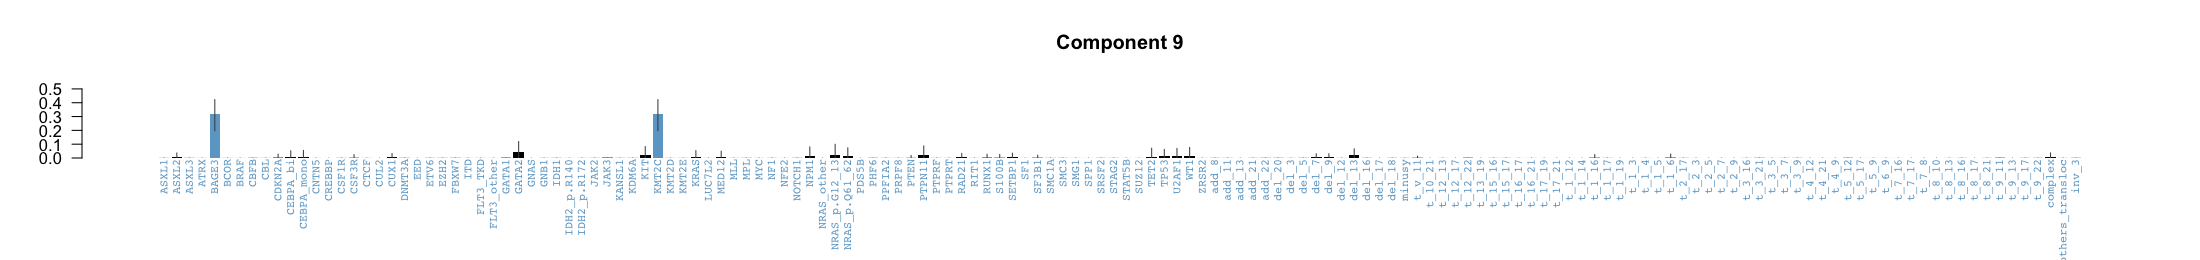

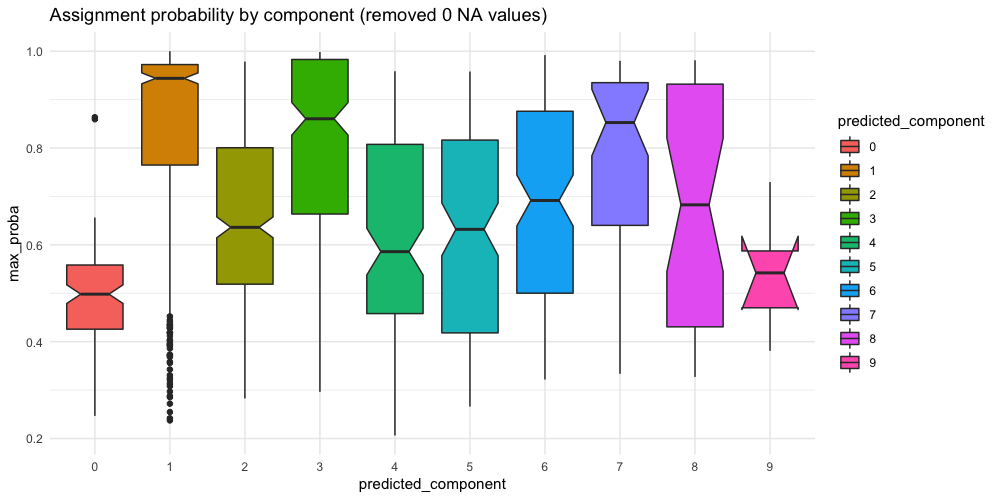

In [44]:
df_final <- read.table("../../../data/updated_dataset/modif_final.csv",sep = ',' , header = T)
rownames(df_final)<- df_final$data_pd
df_final <- df_final[,-1:-3]

#df_final <-
#head(data.frame(read.table("../finalization_clustering/all_components_with_second_complex_inv3.tsv")))
df_final <- merge(df_final,read.table("../finalization_clustering/all_components_with_second_complex_inv3.tsv")[,156:157],by=0)
df_final <- df_final[,-1]
df_final <- df_final[,-length(colnames(df_final))]
data <- df_final
posterior_samples <- 250
initial_clusters <- 18
burn <- 7000
chains <- 3
base_dist <- gaussian
aa <- 2
ab <- 0.5

multi_output <- launch(data,base_dist,initial_clusters,burn,posterior_samples,chains,aa,ab)
multi_output_cluster_10 <- extract_components(multi_output)

plot_components_size(multi_output_cluster_10,8,4.5)
set_notebook_plot_size(22, 2.6)
    plot_comp_distn(multi_output_cluster_10,
                    cat_names  = colnames(df_final),
                    col        = "skyblue3",
                    col_nonsig = "black",
                                         )

dd_predicted_10_components <- get_prediction_result_dataframe(multi_output_cluster_10, df_final)
get_table(dd_predicted_10_components[,'predicted_component'])
plot_assignement_probability_by_component(dd_predicted_10_components)